## Read data 

### Supporting function - Demonstration

In utility.py, we provide a supporting function that reads all the data (six csv files) from the folder of one test, and create a aggregated dataframe to store all the data. To use this function, you need to specify the path of the folder of one test. Below is a demonstration how to read all the data from one test in folder `robot_digital_twin\condition_monitoring_matlab_ros\matlab_application\collected_data\20240105_164214` and create a dataframe.

In [1]:
from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../robot_digital_twin/condition_monitoring_matlab_ros/matlab_application/collected_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)
df_data.head()

time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                     80  ...                   0                    619   
1                     80  ...                   0                    619   
2                     79  ...                   0                    619   
3                     79  ...                   0                    619   
4                     79  ...                   0                    619   

   data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                        43                  7312                   0   
1                        43                  7332                   0   
2                        43                  7330                   0   
3                        43                  7319                   0   
4                        43                  7348                   0   

   data_motor_6_position  data_motor_6_temperature  data_motor_6_voltage  \
0                    500                        24                  7361   
1                    499                        24                  7372   
2                    499                        24                  7356   
3                    499                        24                  7374   
4                    499                        24                  7365   

   data_motor_6_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

### Remove outlier using customized function

By default, the supporting function detects outliers for temperature and voltage based on a valid range. For tempaertaure, the valid range is 0 to 200 degrees Celsius. For voltage, the range is 6000 to 9000 mini volts. If a outlier is detected, the corresponding data point is replaced with the previous valid data point.

You can change the outlier removal function following the demonstration below.

In [2]:
import numpy as np

def customized_outlier_removal(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 500, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= -10, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 2000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 10000, np.nan)
    df['voltage'] = df['voltage'].ffill()

# Read the data with the customized outlier removal function.
df_data = read_all_csvs_one_test(folder_path=path, test_id=dictionary_name, outlier_removal=customized_outlier_removal)
df_data.head()

time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                     80  ...                   0                    619   
1                     80  ...                   0                    619   
2                     79  ...                   0                    619   
3                     79  ...                   0                    619   
4                     79  ...                   0                    619   

   data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                        43                  7312                   0   
1                        43                  7332                   0   
2                        43                  7330                   0   
3                        43                  7319                   0   
4                        43                  7348                   0   

   data_motor_6_position  data_motor_6_temperature  data_motor_6_voltage  \
0                    500                        24                  7361   
1                    499                        24                  7372   
2                    499                        24                  7356   
3                    499                        24                  7374   
4                    499                        24                  7365   

   data_motor_6_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

### Read all the data and visualize them

Below is a demonstration of how to read all the data and visualize them.

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



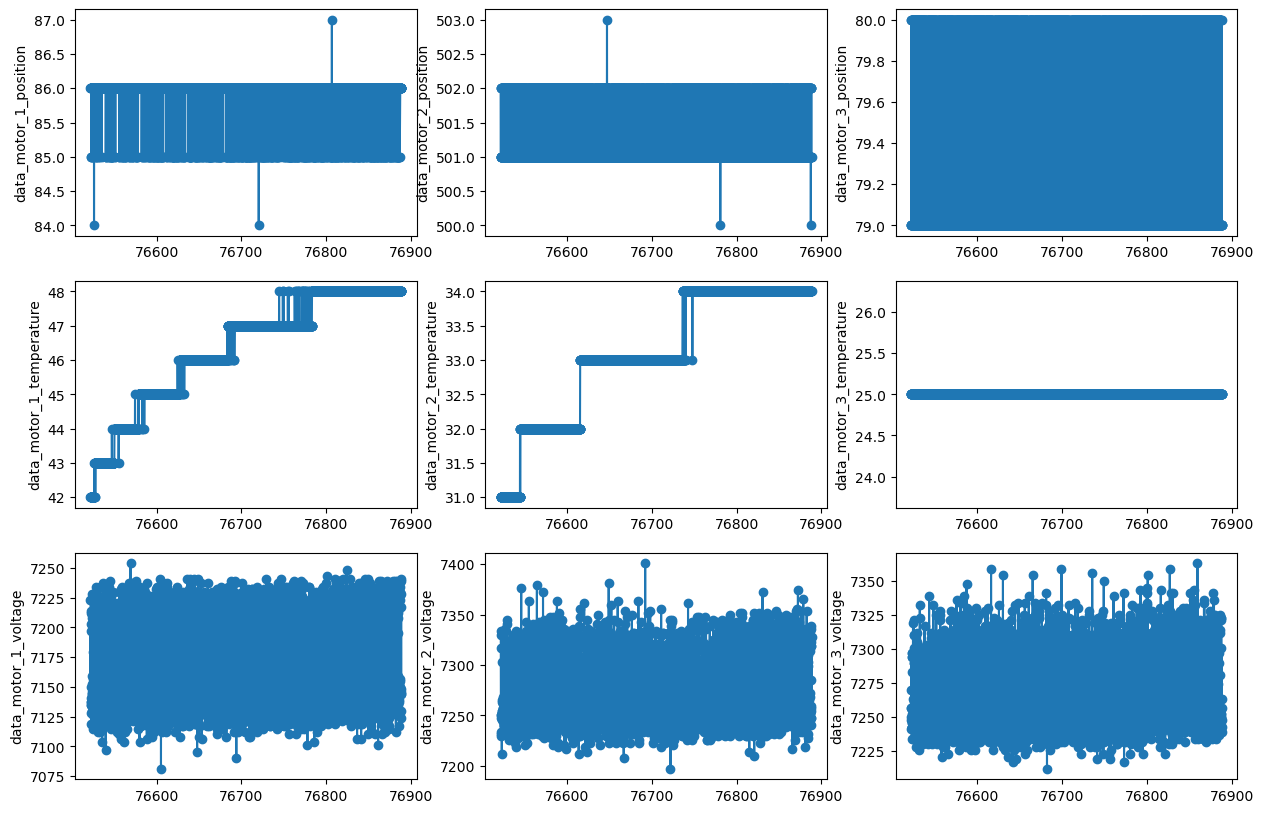

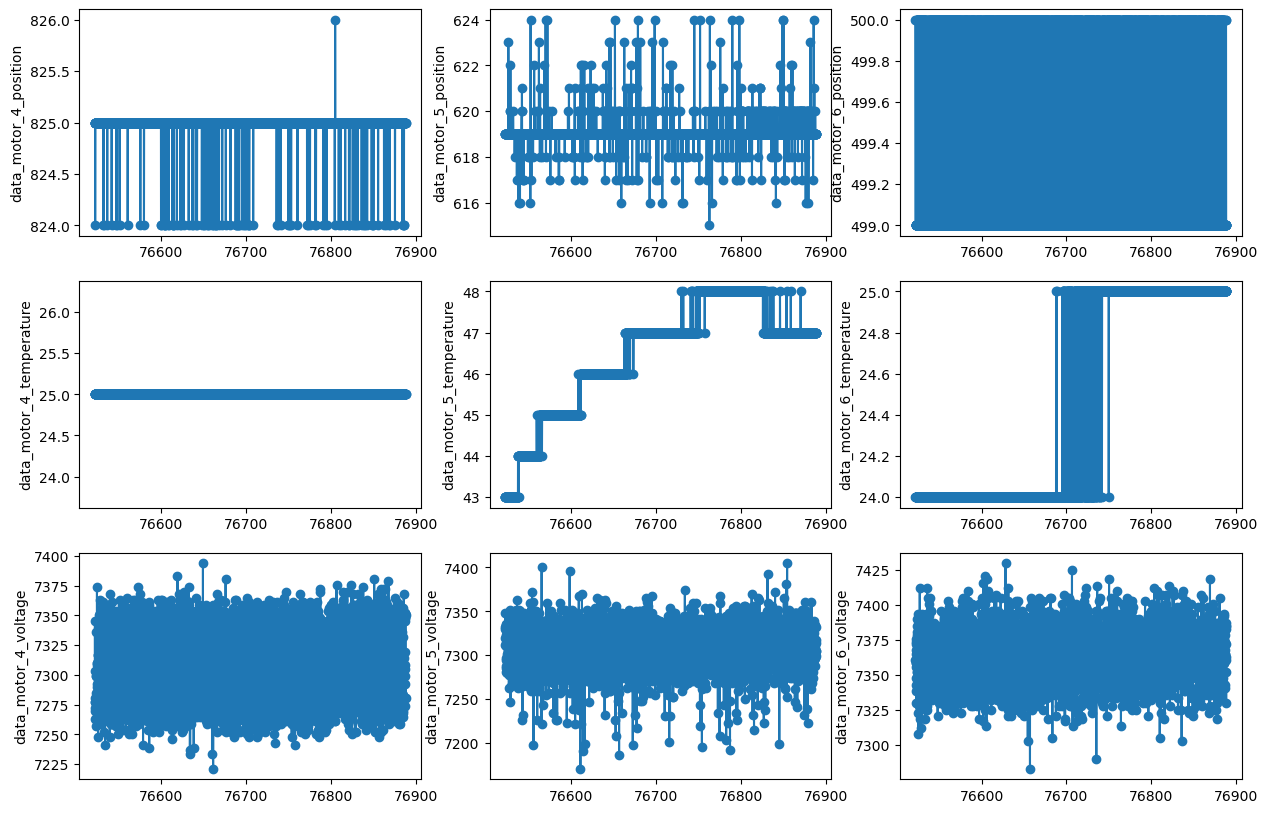

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



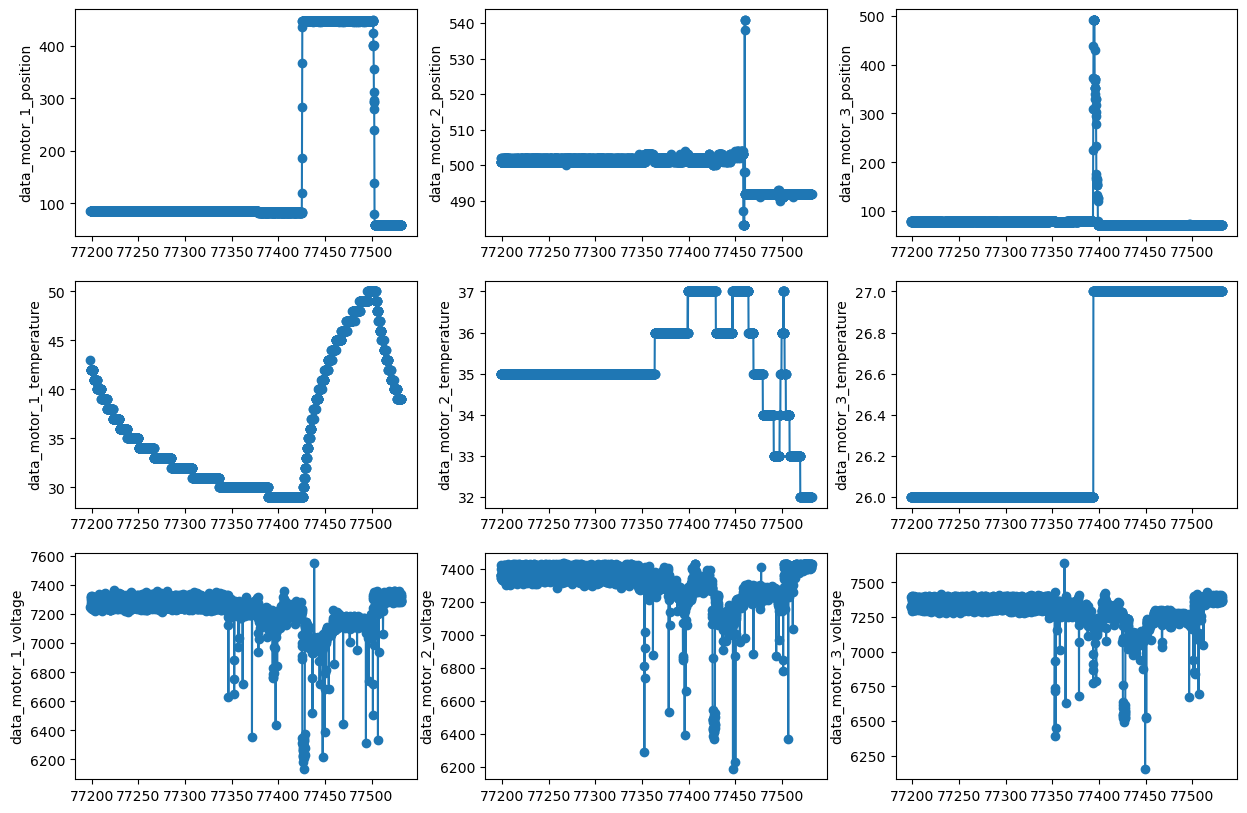

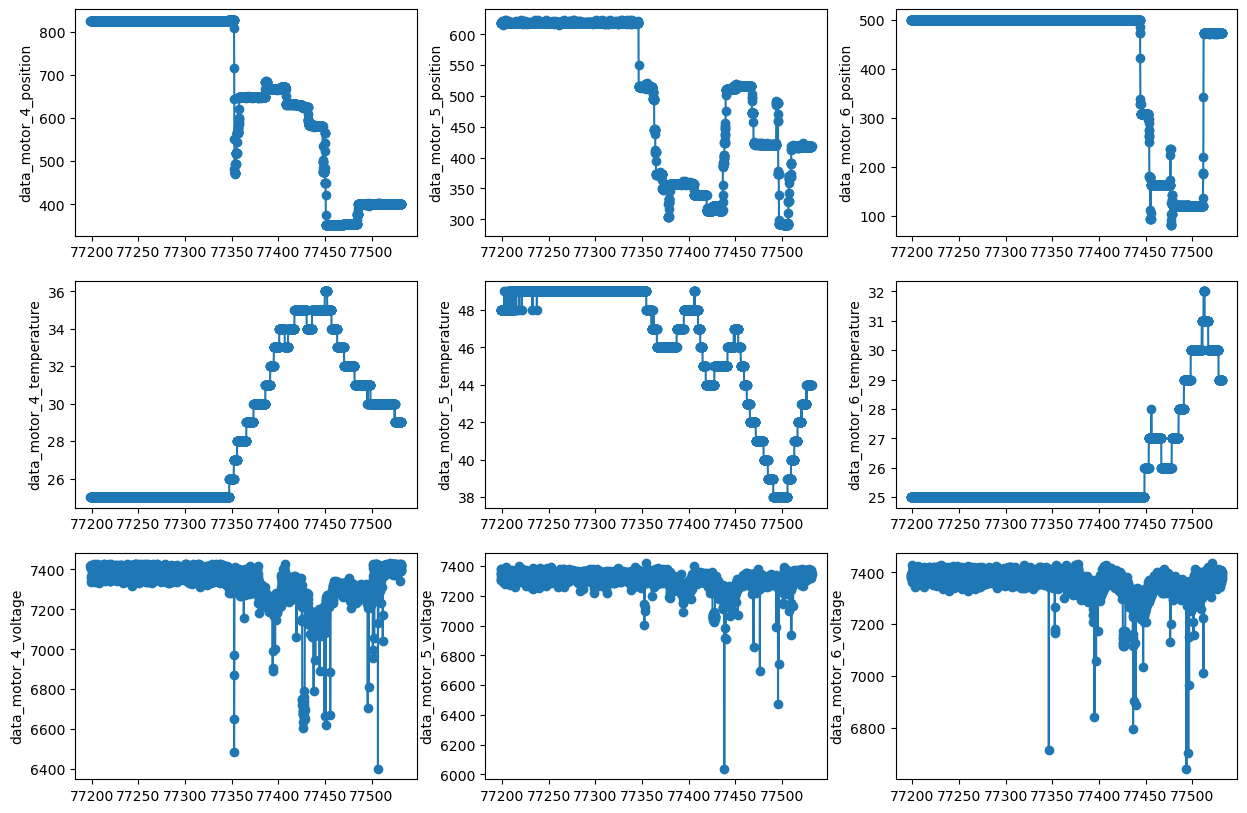

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



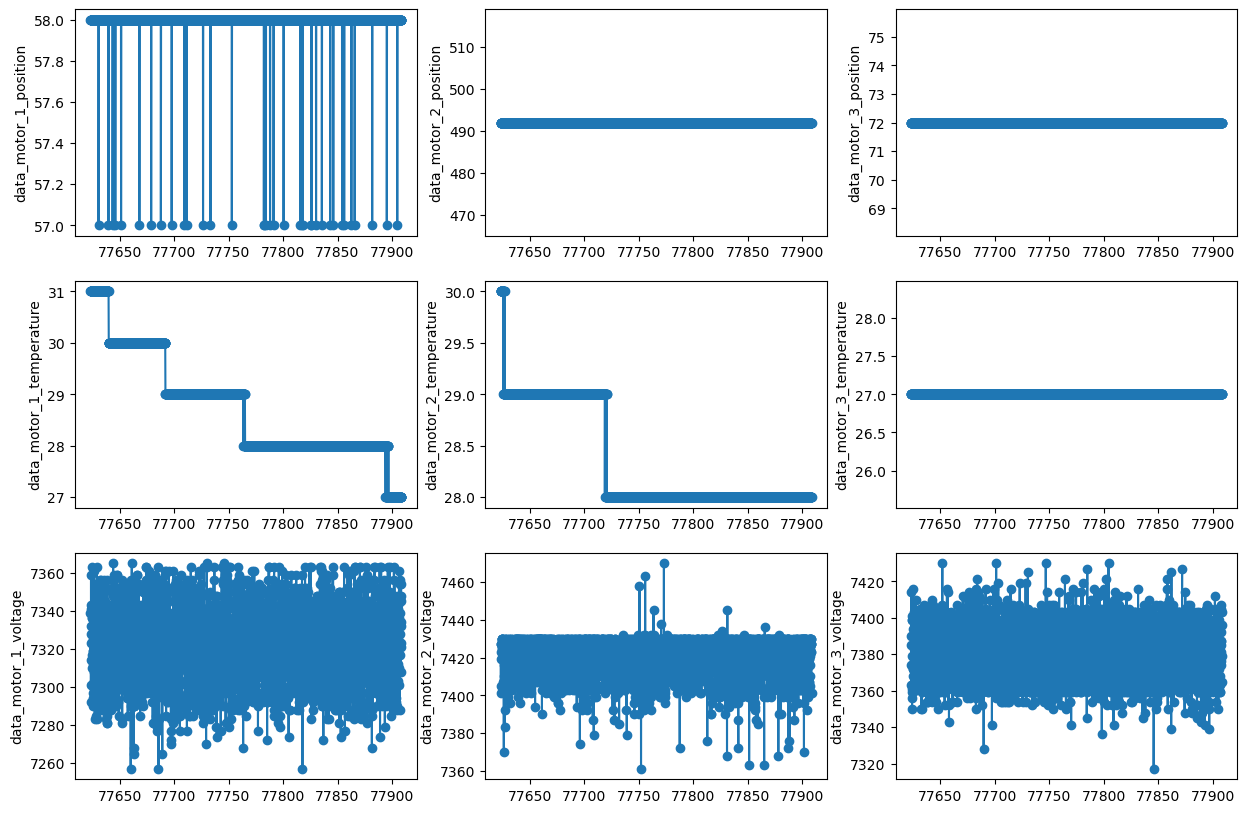

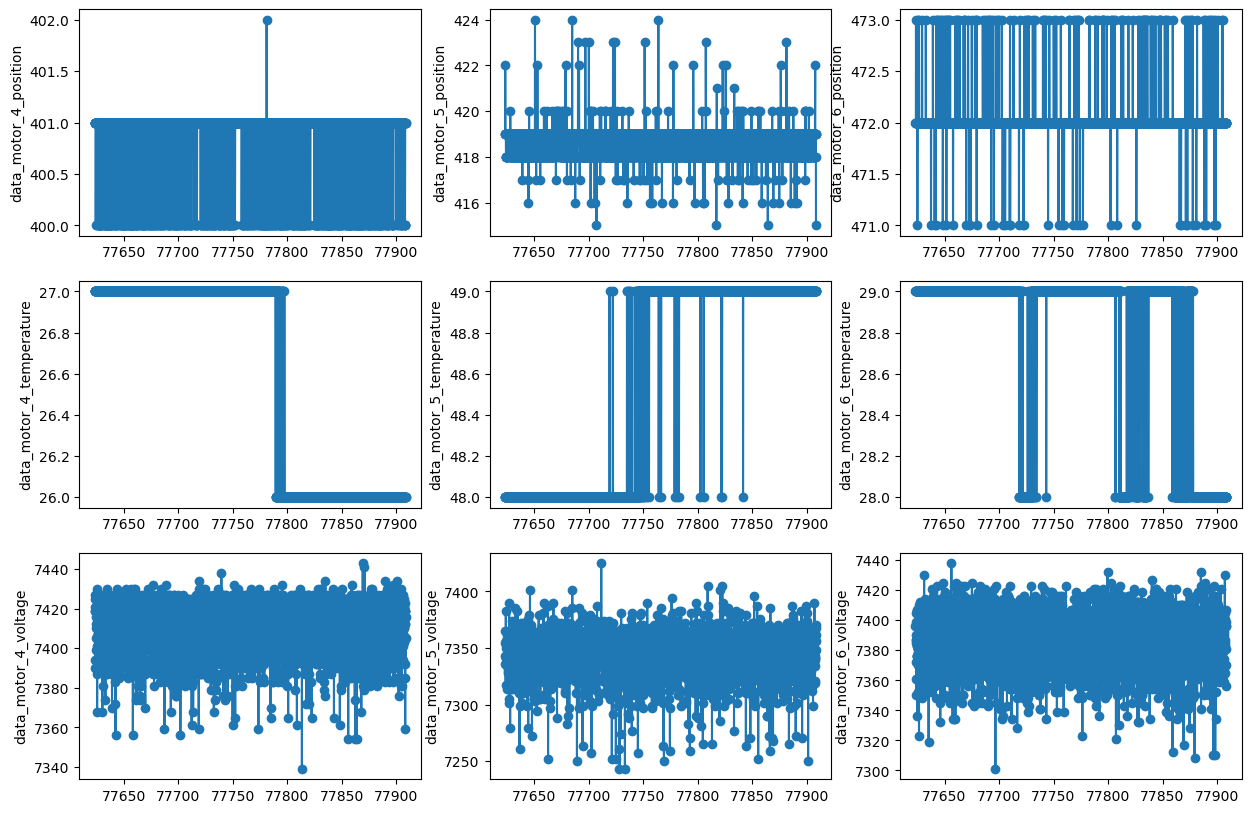

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



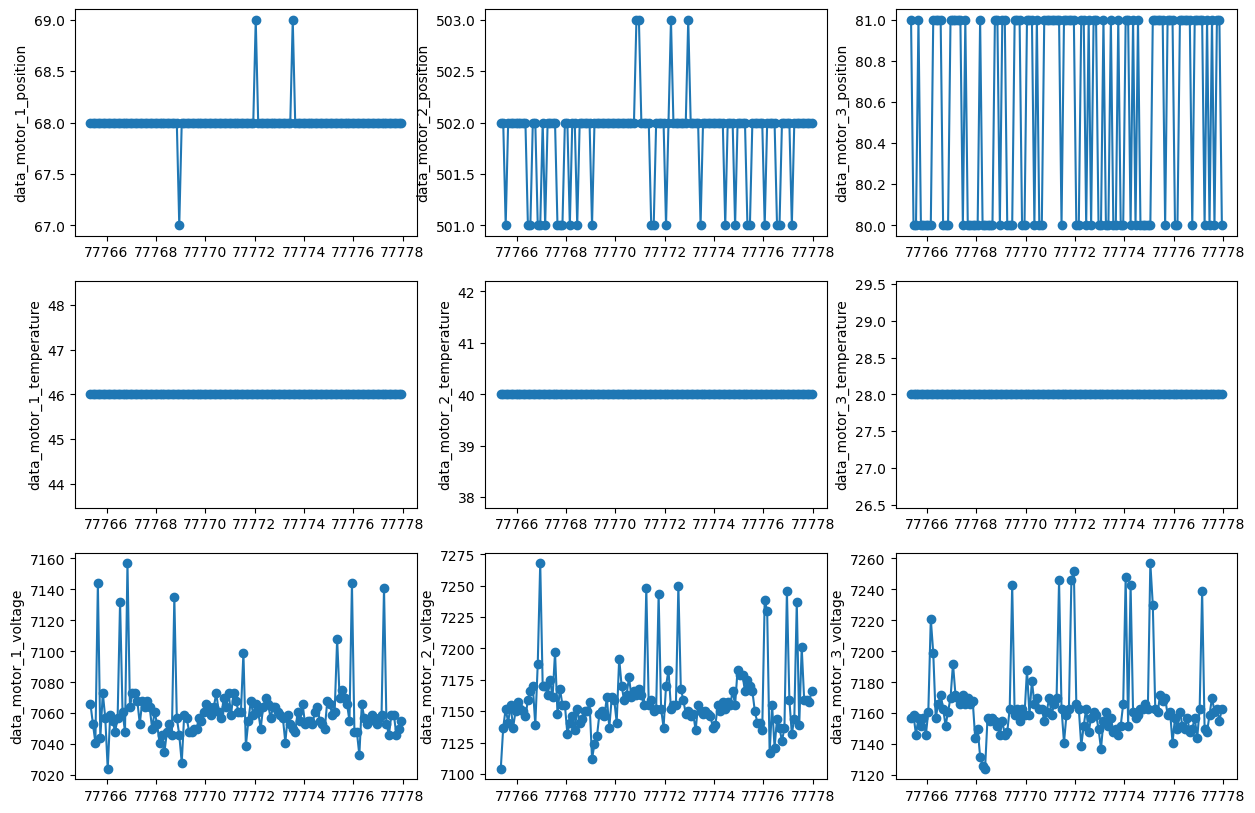

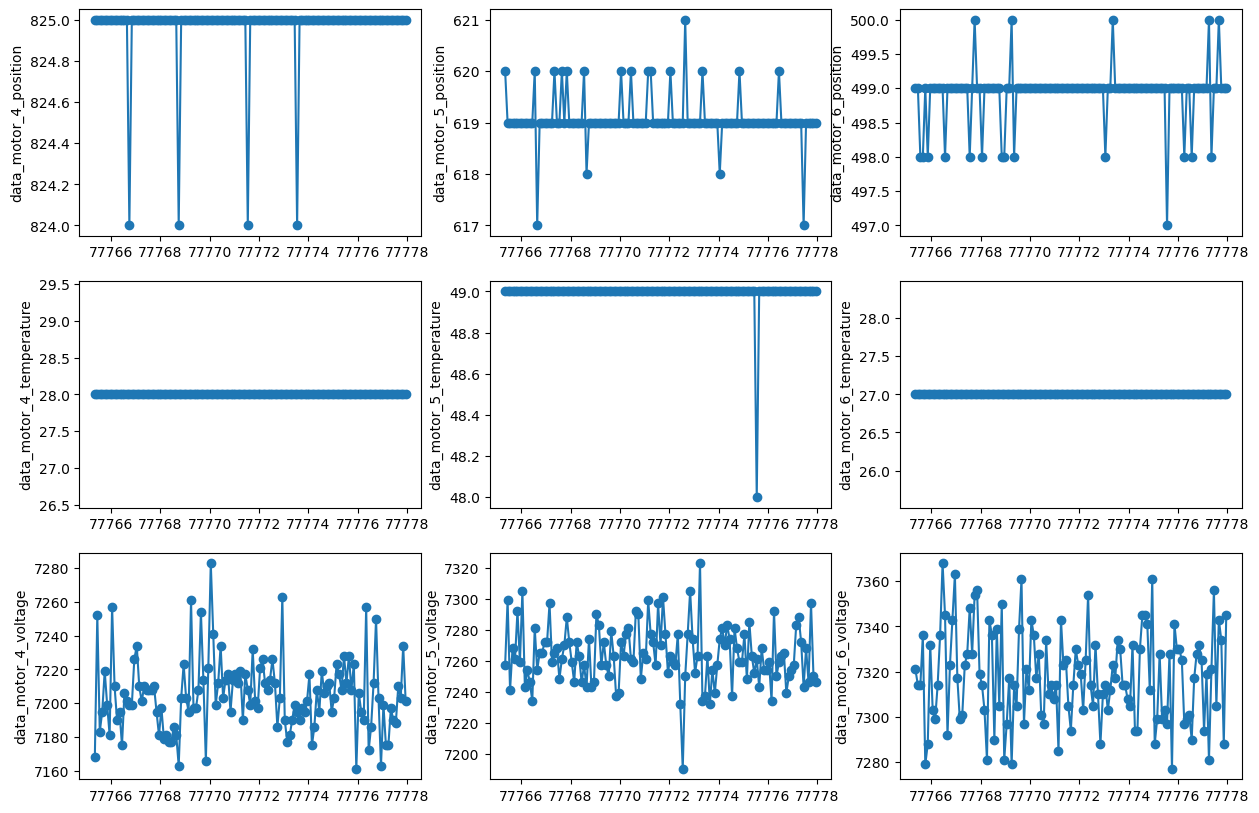

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



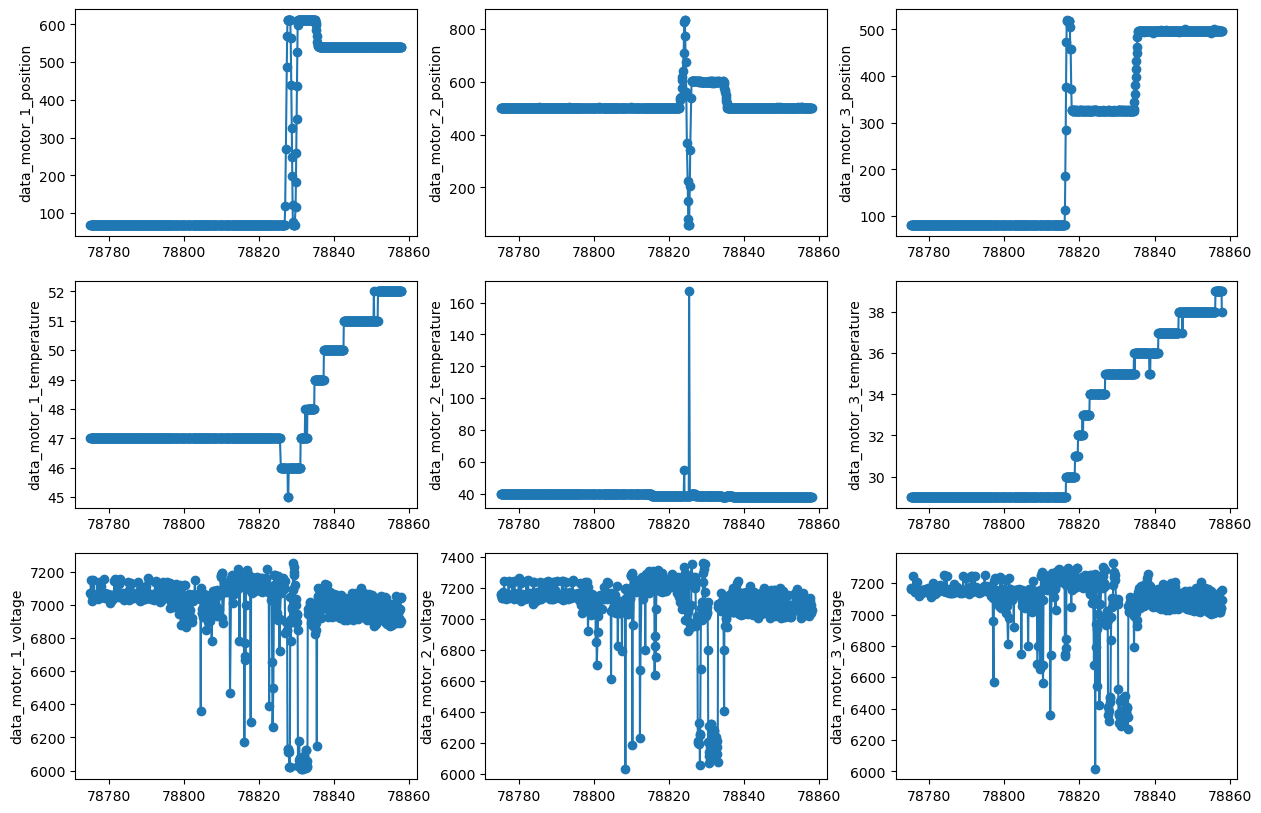

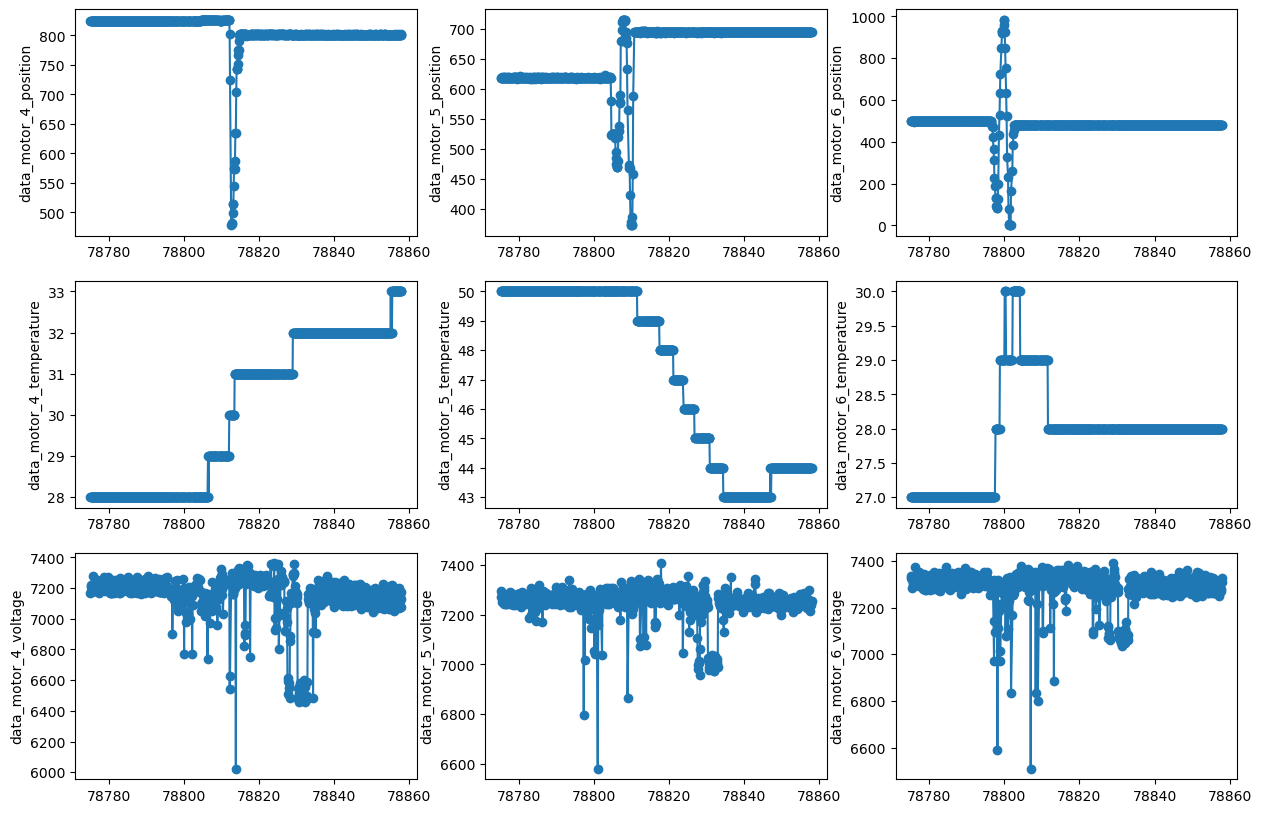

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



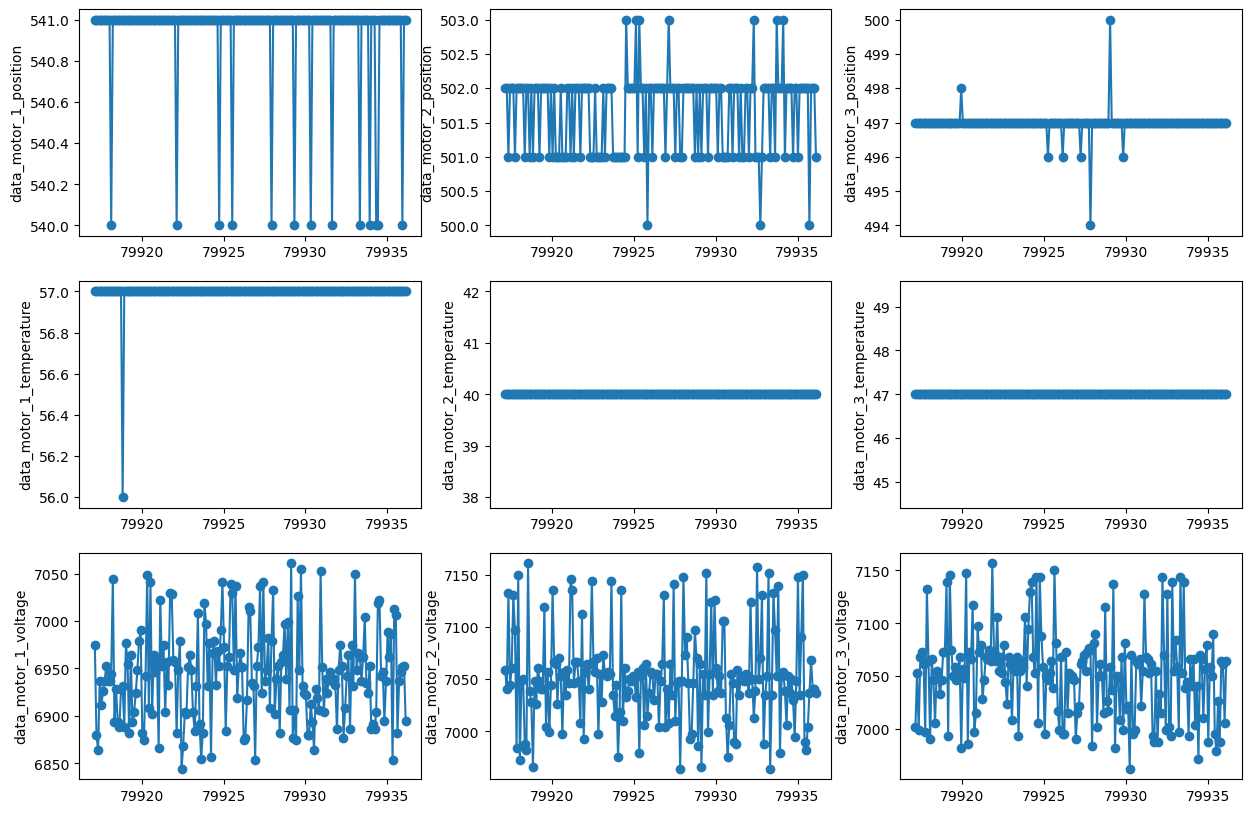

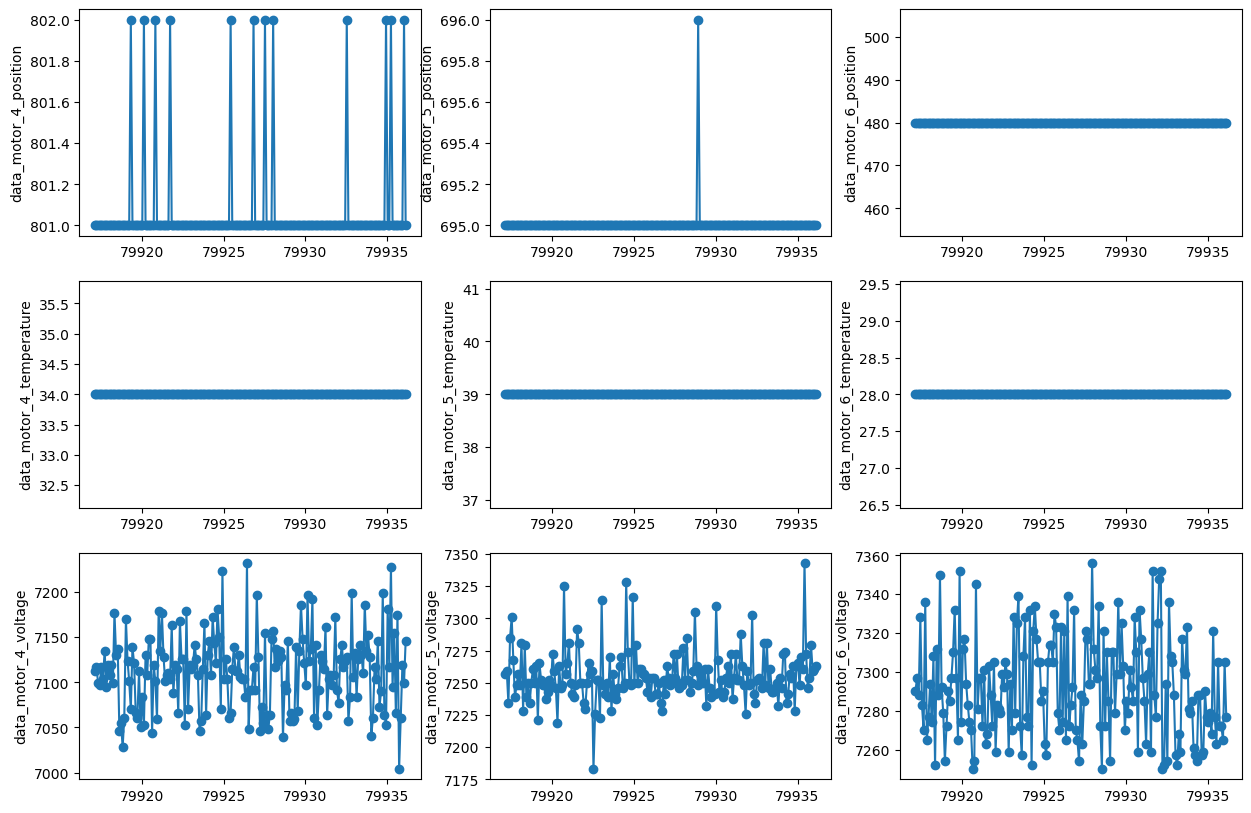

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



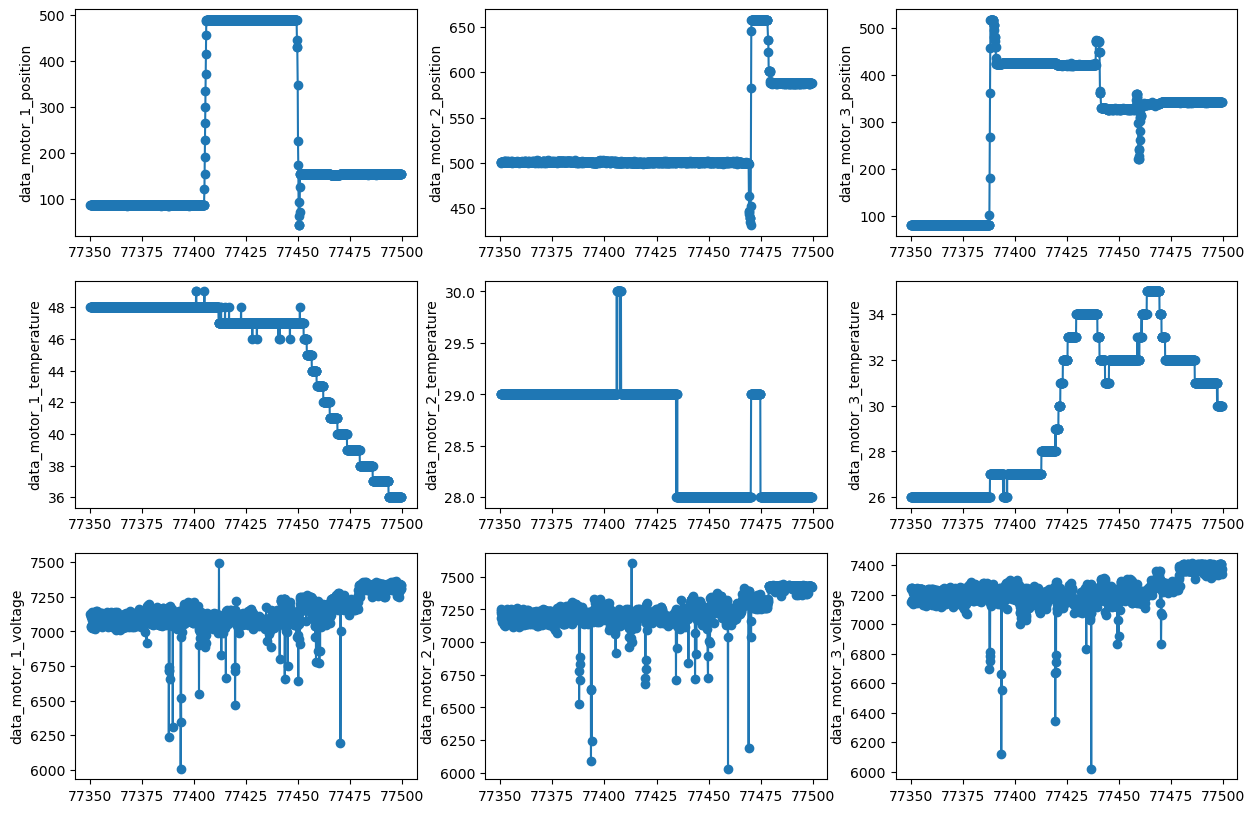

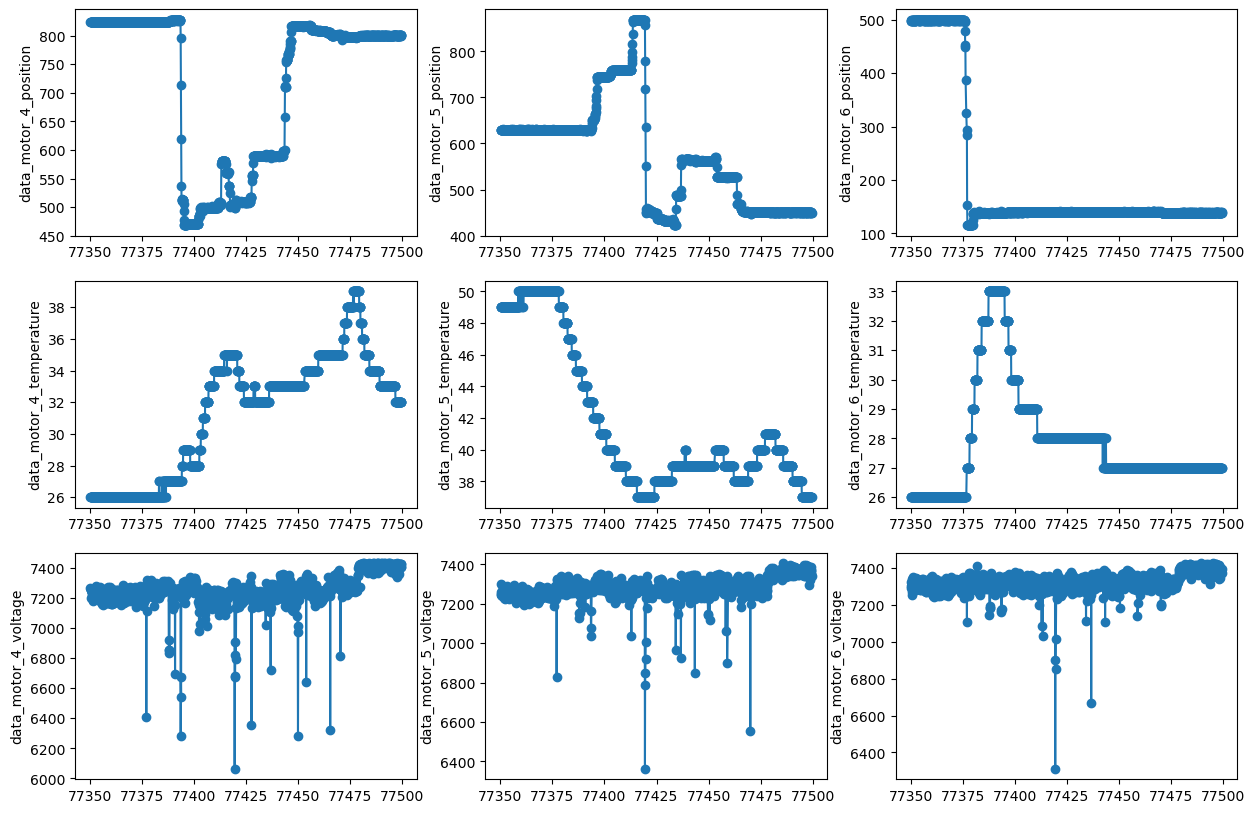

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



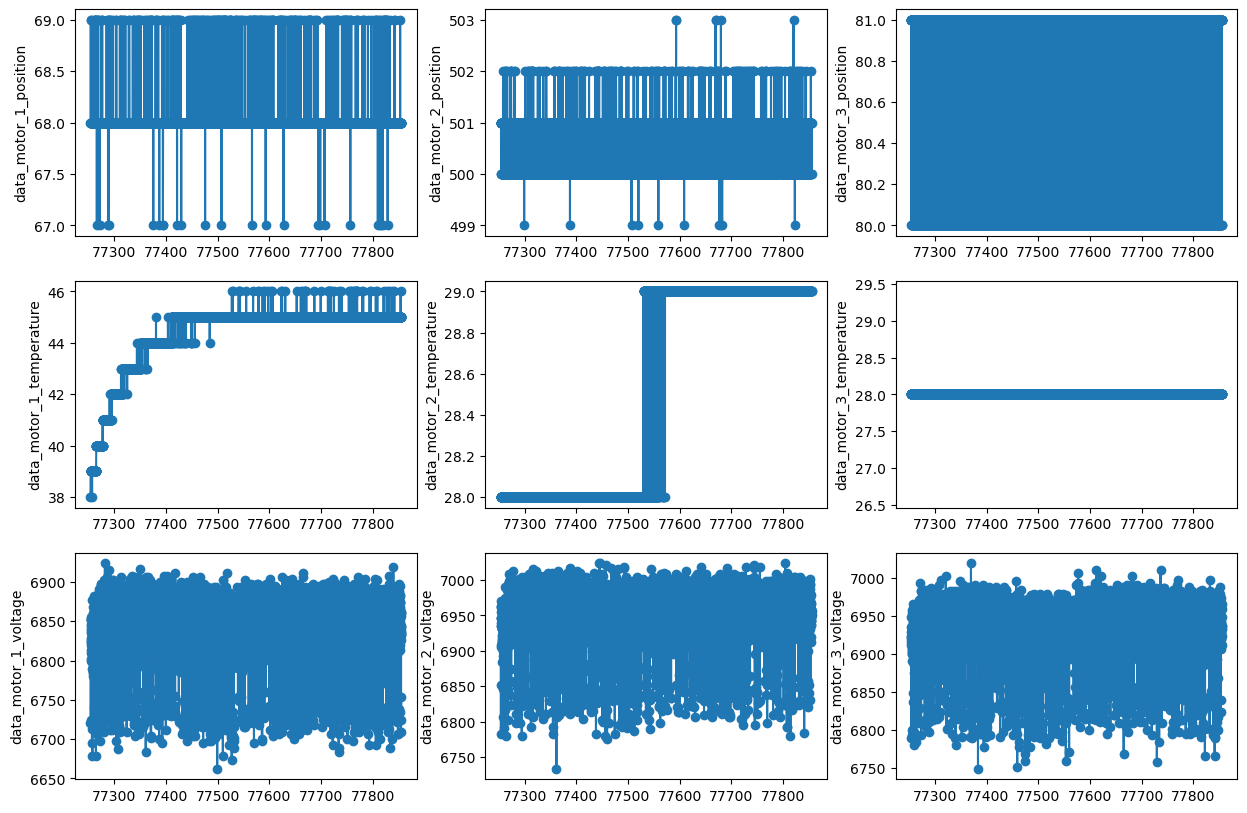

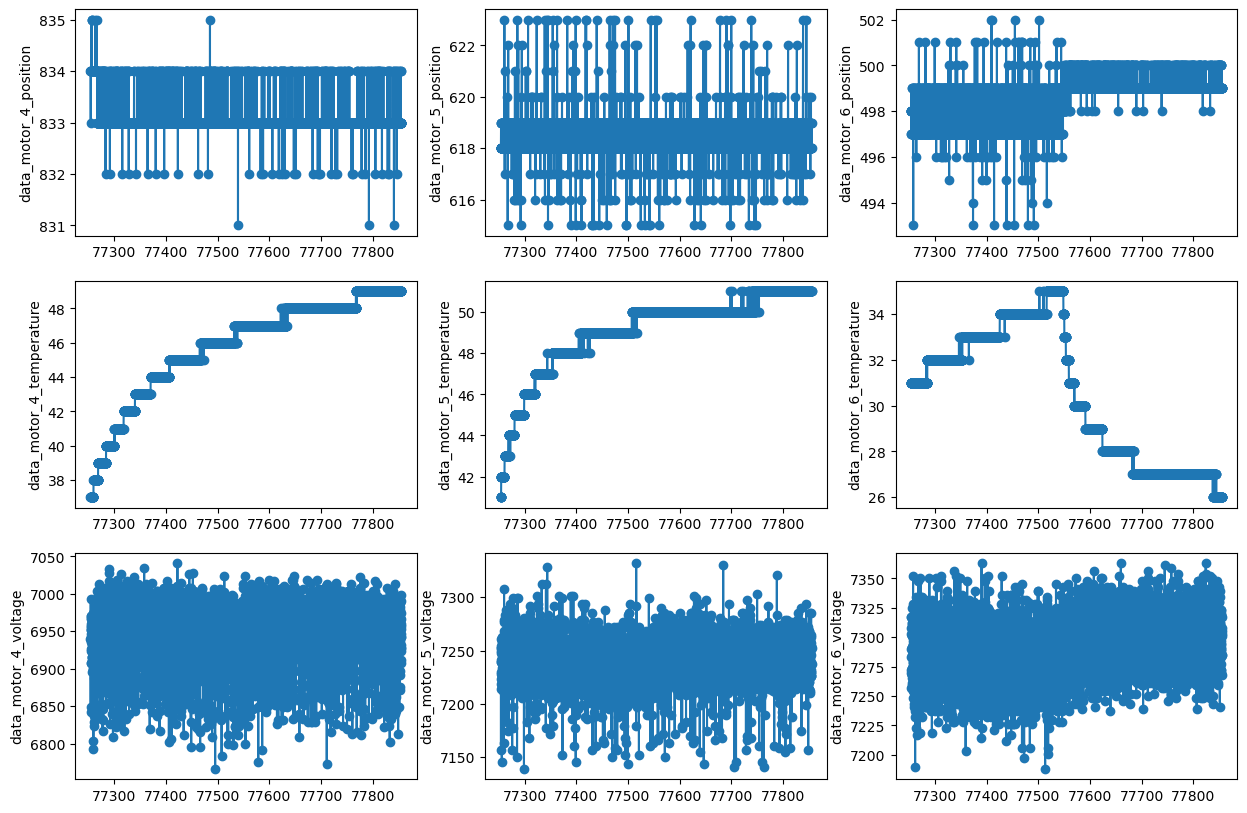

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



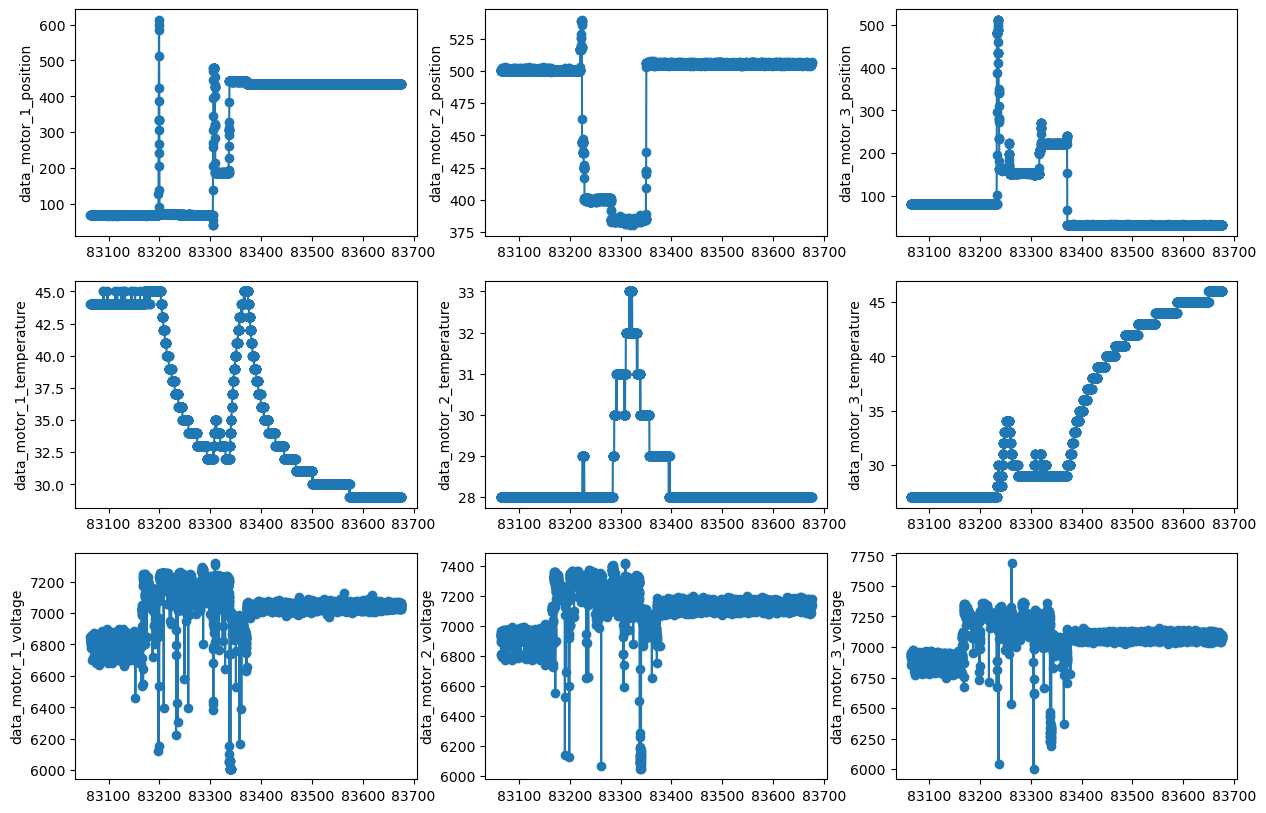

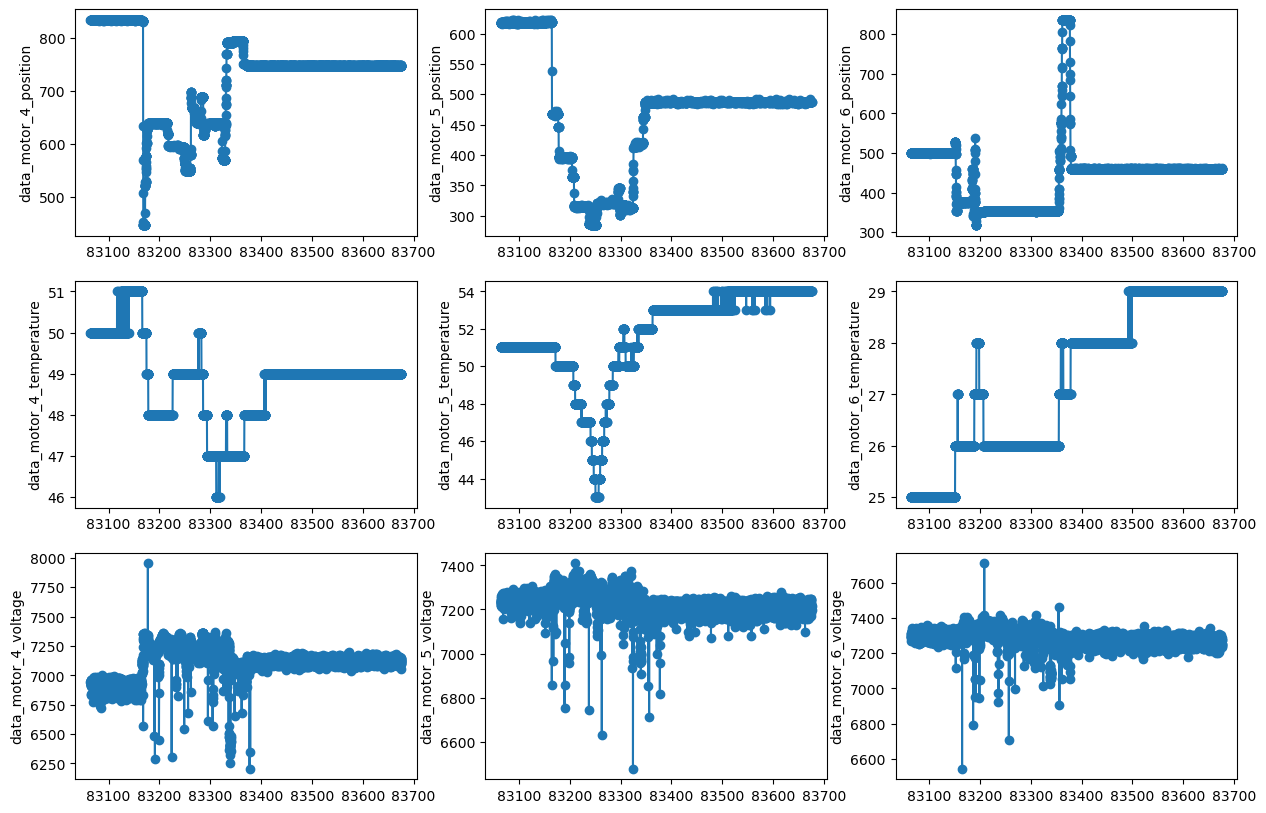

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



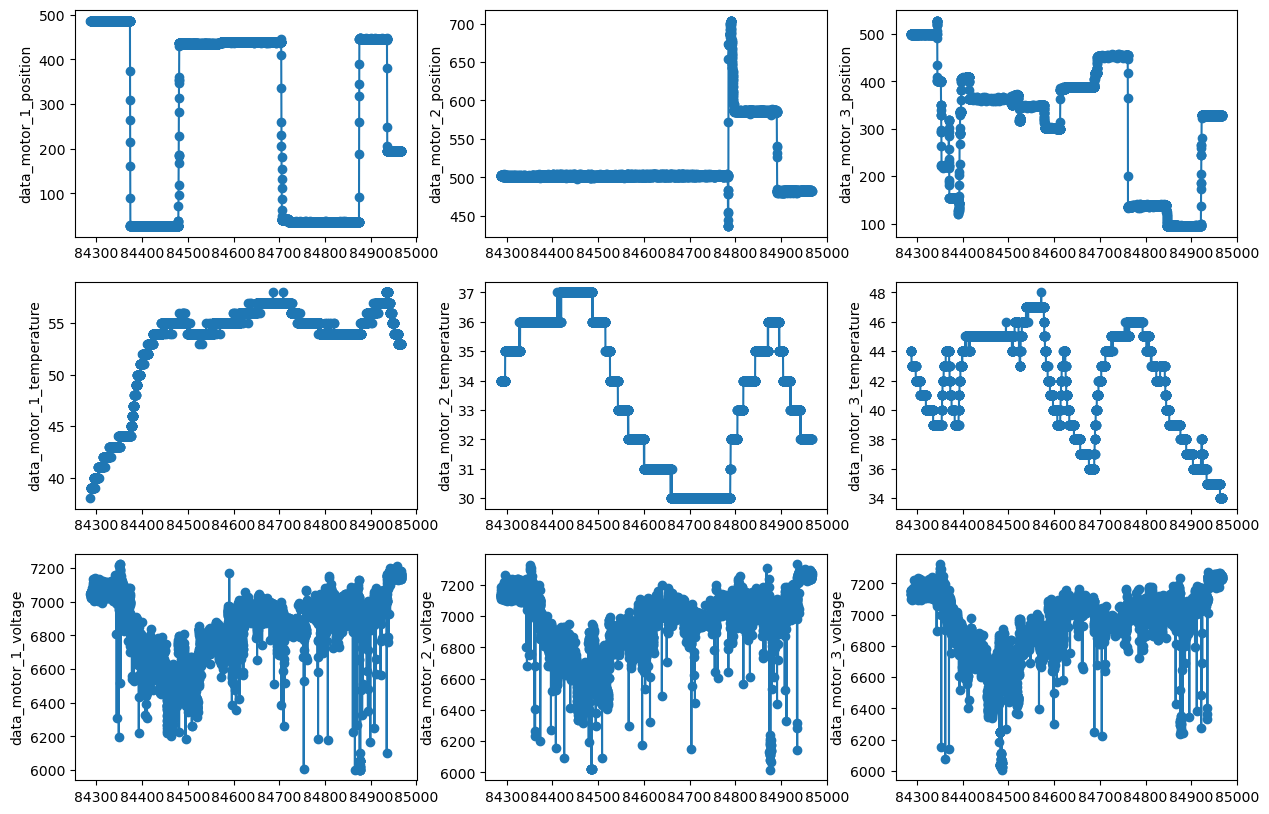

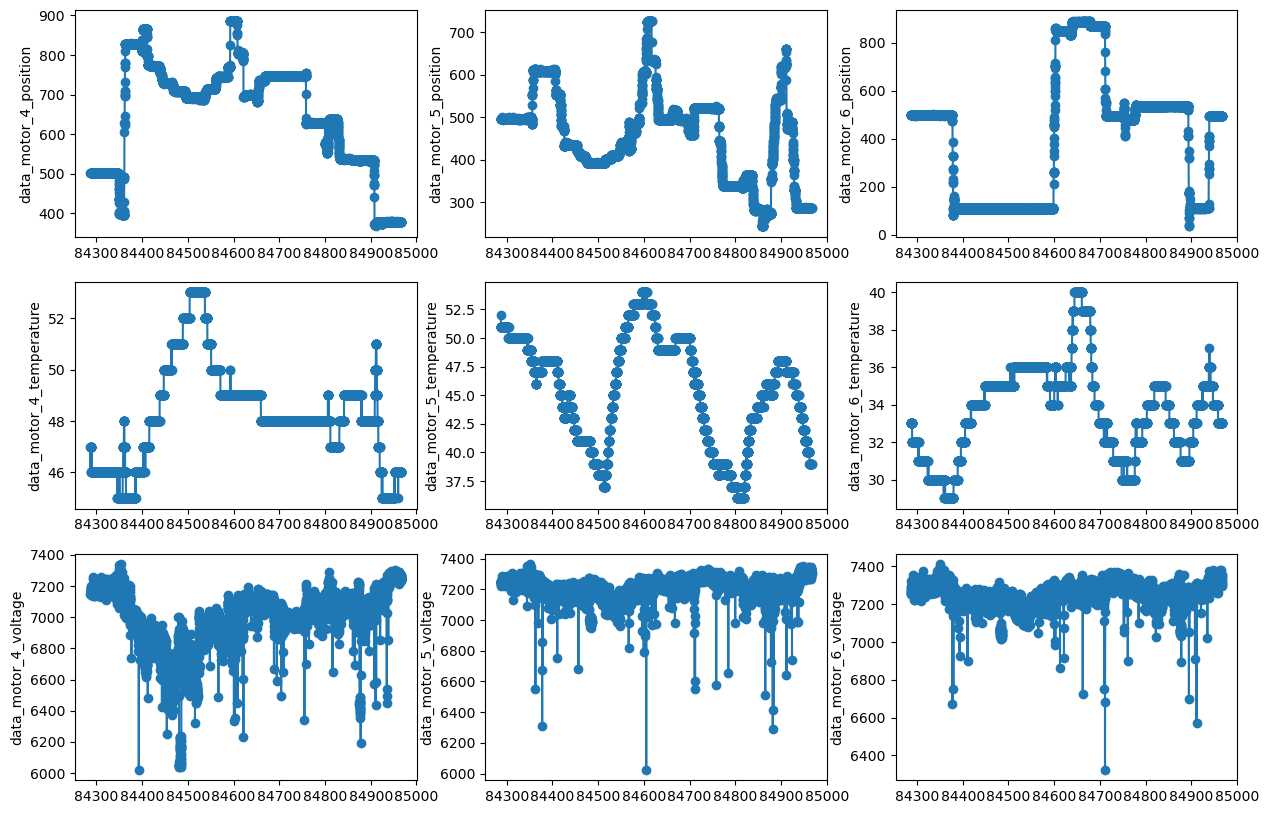

In [3]:
from utility import read_all_csvs_one_test
import matplotlib.pyplot as plt
import pandas as pd
import os

base_dictionary = '../../robot_digital_twin/condition_monitoring_matlab_ros/matlab_application/collected_data/'
# Get all the folders in the base_dictionary
path_list = os.listdir(base_dictionary)
# Only keep the folders, not the excel file.
path_list = path_list[:-1]

# Read the data.
df_data = pd.DataFrame()
for tmp_path in path_list:
    path = base_dictionary + tmp_path
    tmp_df = read_all_csvs_one_test(path, tmp_path)
    df_data = pd.concat([df_data, tmp_df])
    df_data = df_data.reset_index(drop=True)

# Read the test conditions
df_test_conditions = pd.read_excel(base_dictionary+'Test conditions.xlsx')

# Visulize the data
for selected_sequence_idx in path_list:
    filtered_df = df_data[df_data['test_condition'] == selected_sequence_idx]

    print('{}: {}\n'.format(selected_sequence_idx, df_test_conditions[df_test_conditions['Test id'] == selected_sequence_idx]['Description']))

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    for ax, col in zip(axes.flat, ['data_motor_1_position', 'data_motor_2_position', 'data_motor_3_position', 
        'data_motor_1_temperature', 'data_motor_2_temperature', 'data_motor_3_temperature',
        'data_motor_1_voltage', 'data_motor_2_voltage', 'data_motor_3_voltage']):
        ax.plot(filtered_df['time'], filtered_df[col], marker='o', label=col)
        ax.set_ylabel(col)

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    for ax, col in zip(axes.flat, ['data_motor_4_position', 'data_motor_5_position', 'data_motor_6_position',
        'data_motor_4_temperature', 'data_motor_5_temperature', 'data_motor_6_temperature',
        'data_motor_4_voltage', 'data_motor_5_voltage', 'data_motor_6_voltage']):
        ax.plot(filtered_df['time'], filtered_df[col], marker='o', label=col)
        ax.set_ylabel(col)

    plt.show()

### Apply smoothing as a preprocessing

It can be seen that we have quite a lot of noise in the data, especitally on the voltage. Let's apply a sliding window smoothing to the remove the potential noise.

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



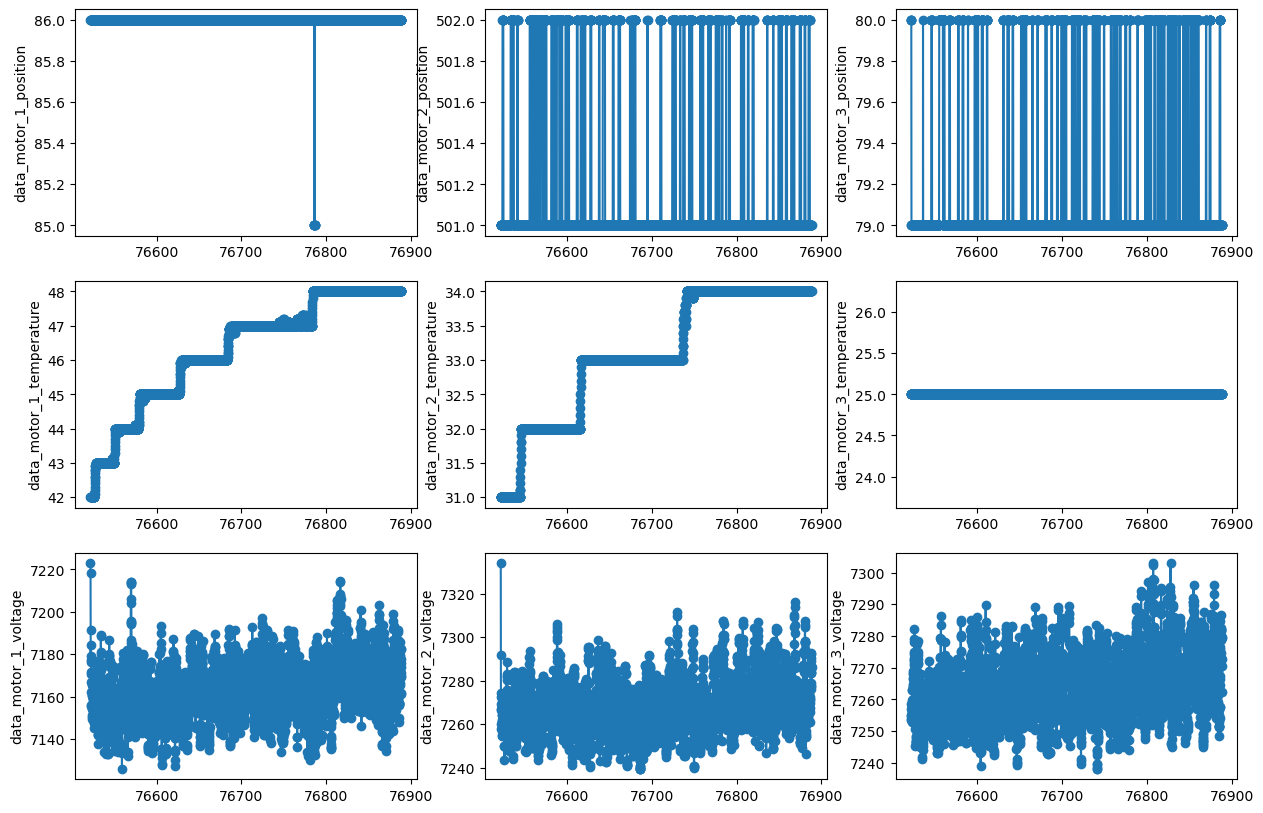

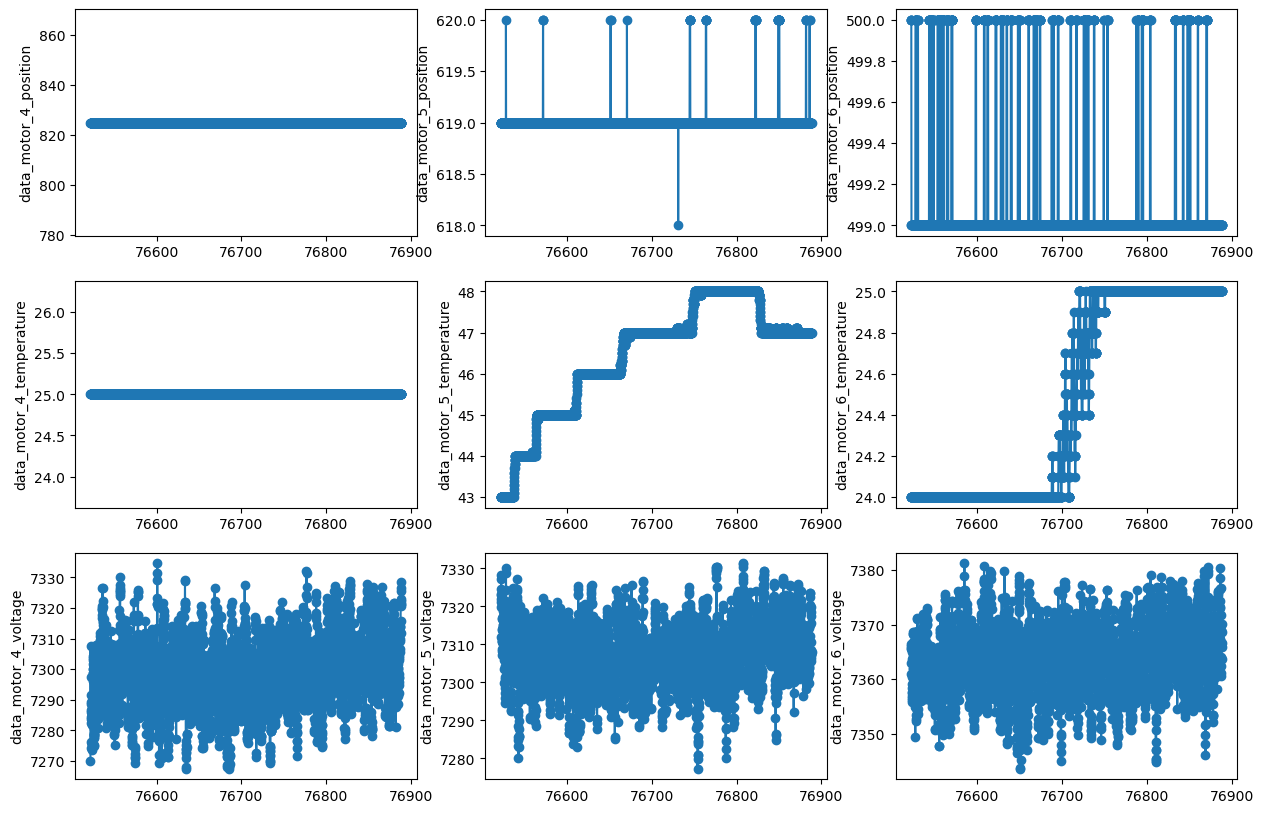

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



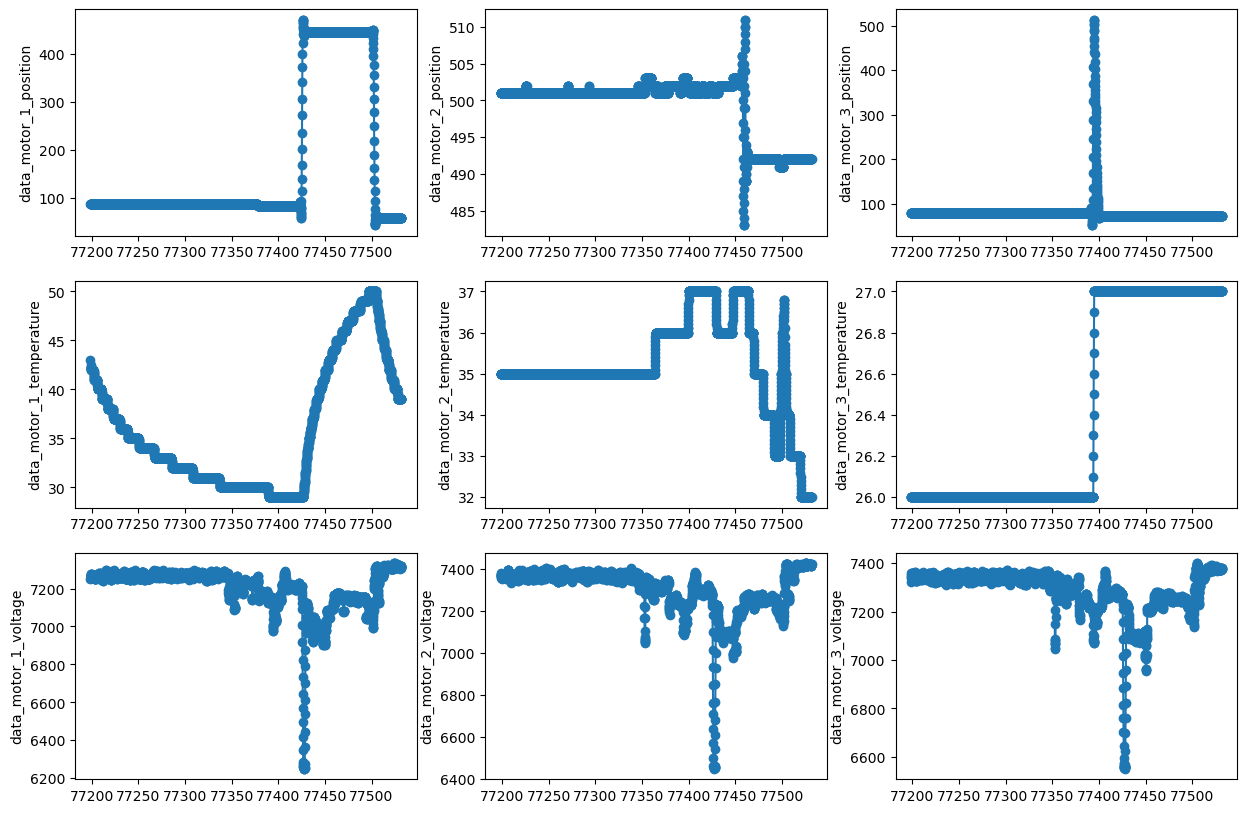

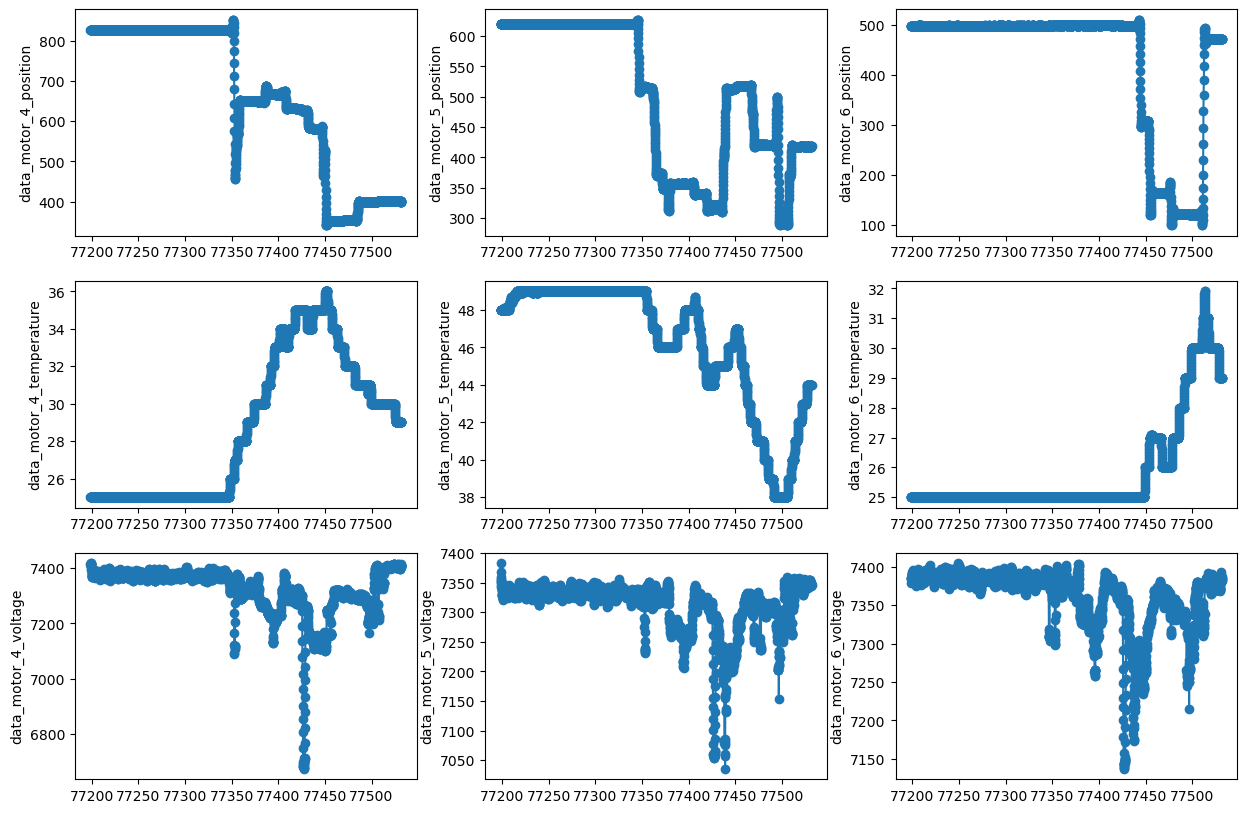

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



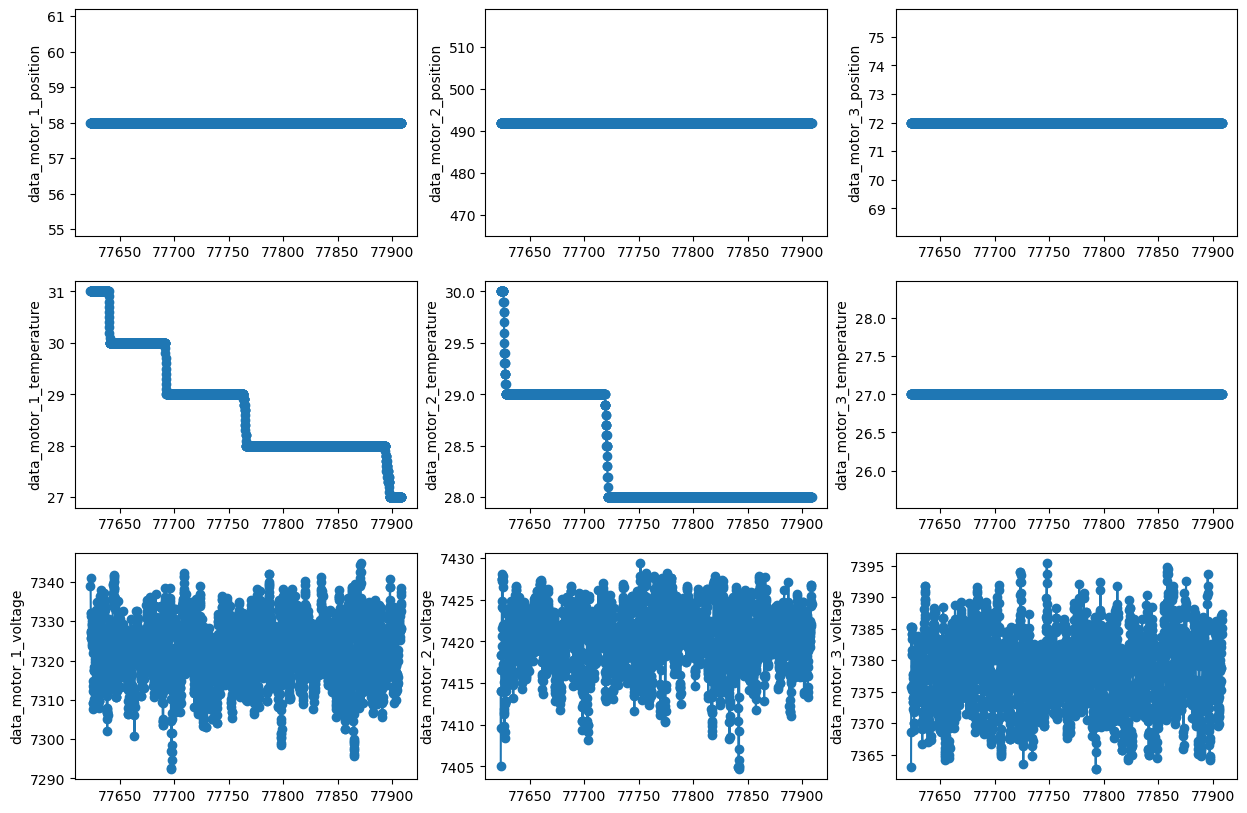

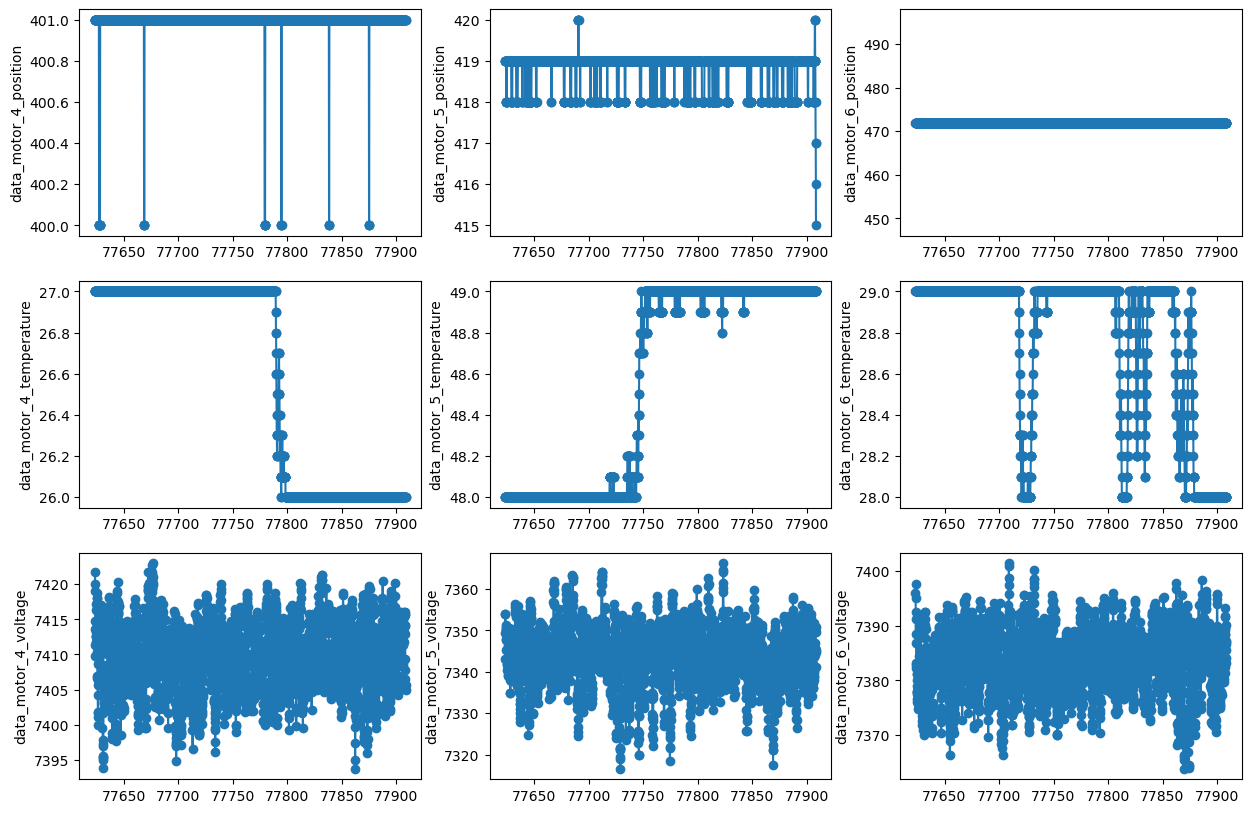

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



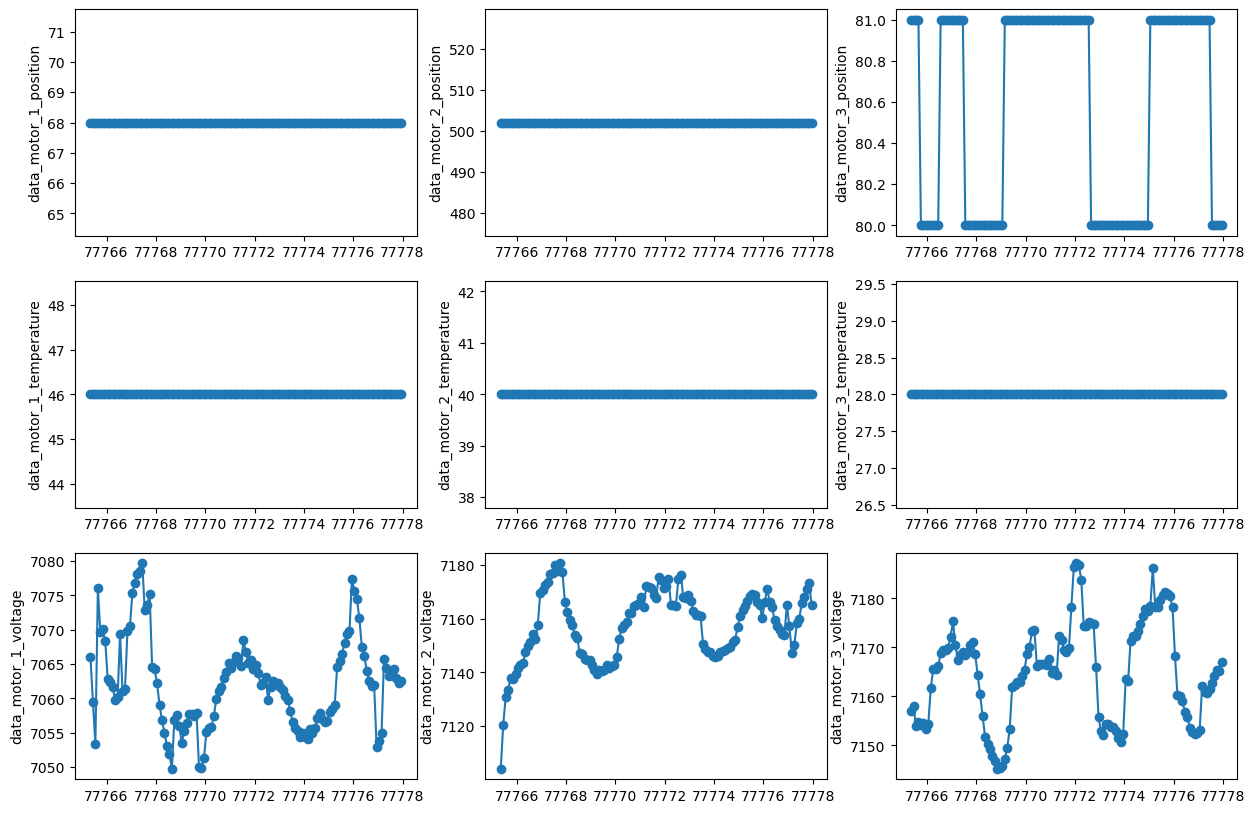

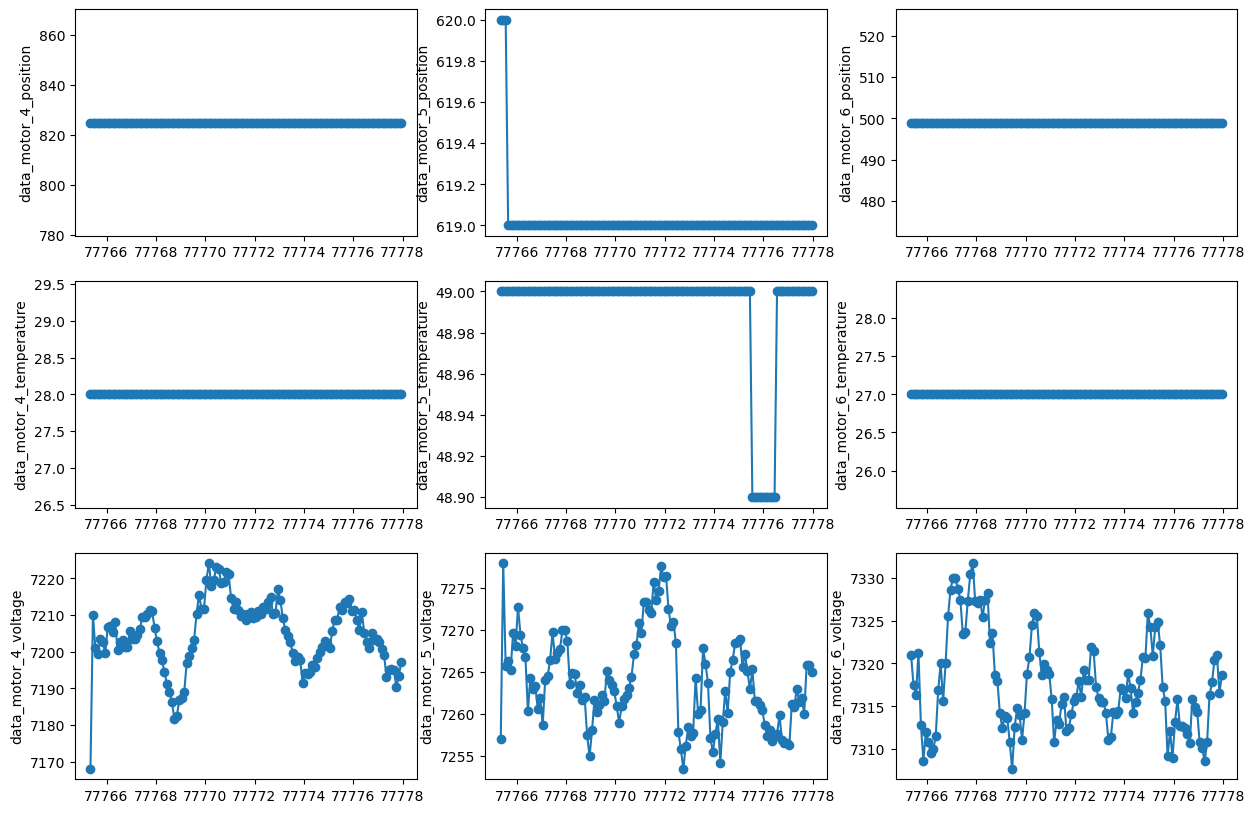

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



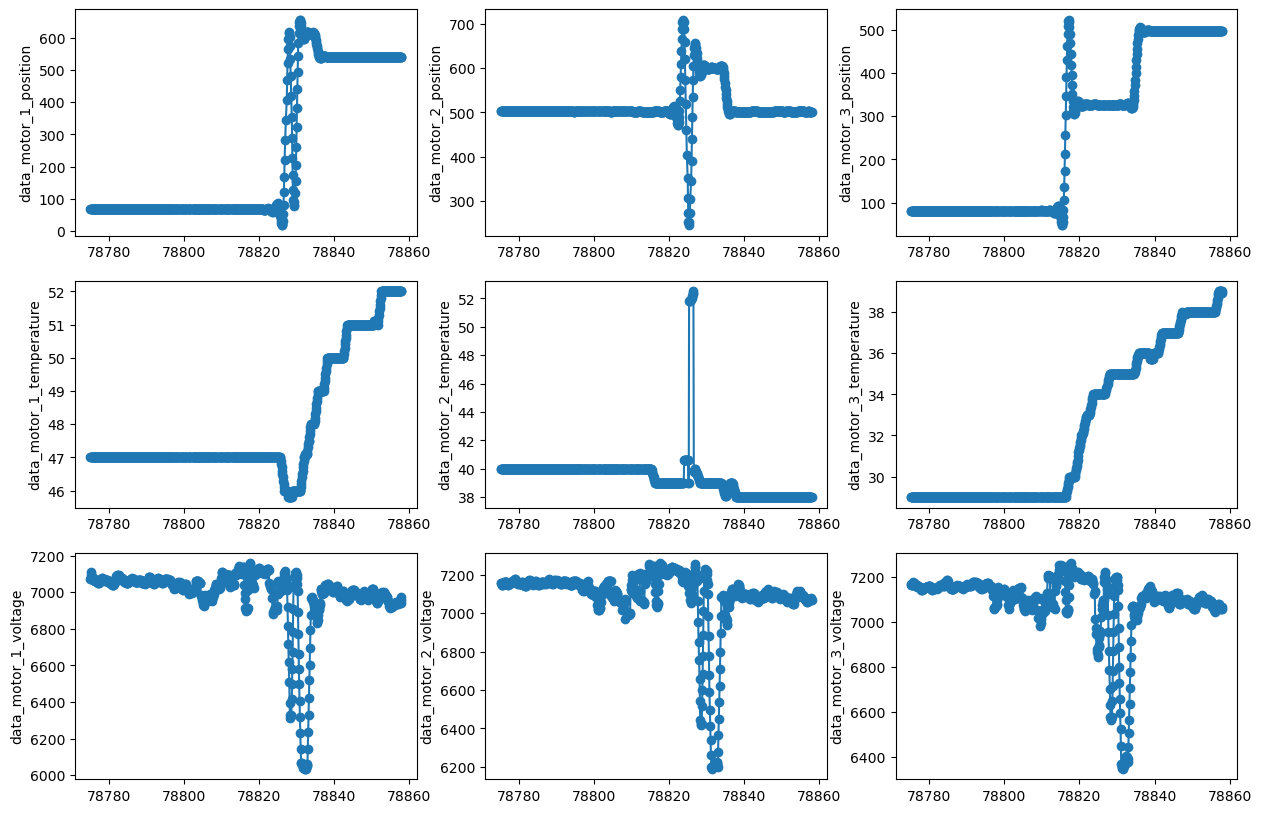

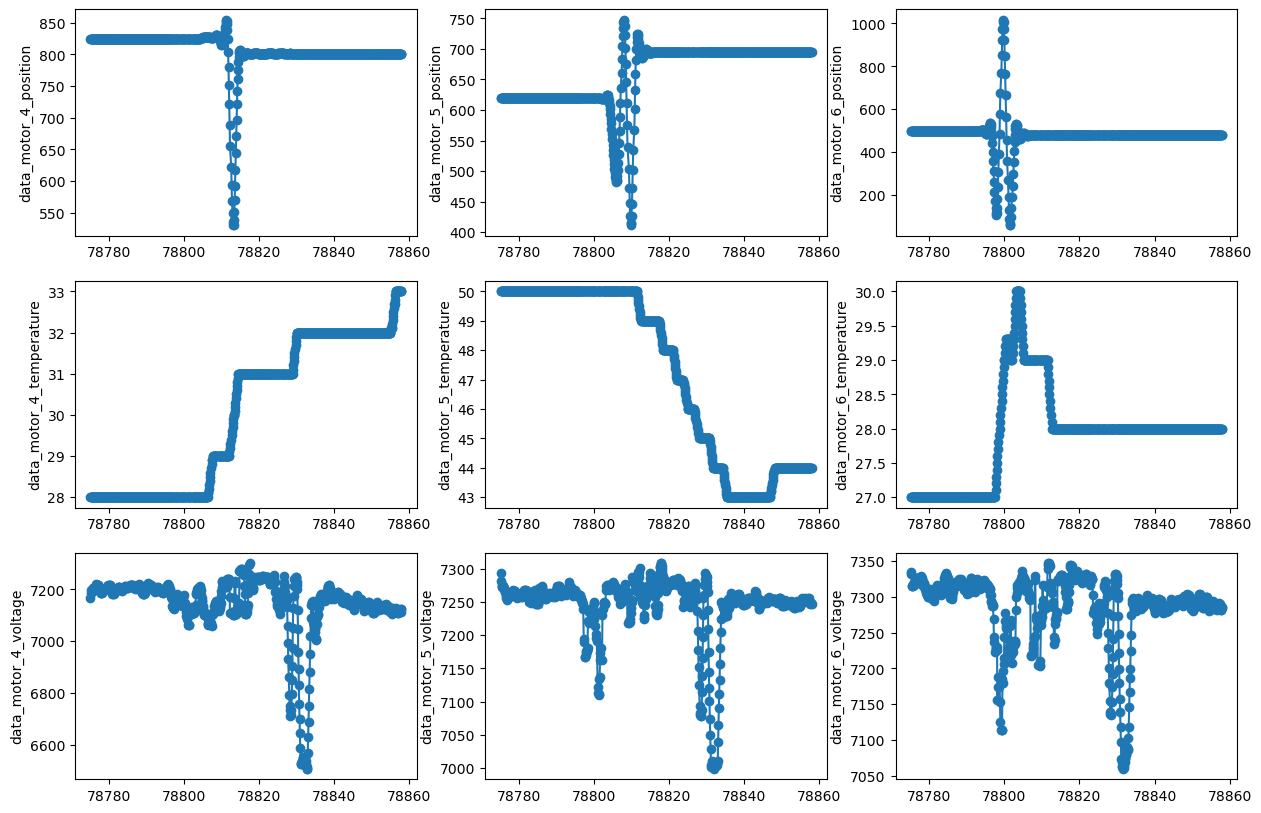

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



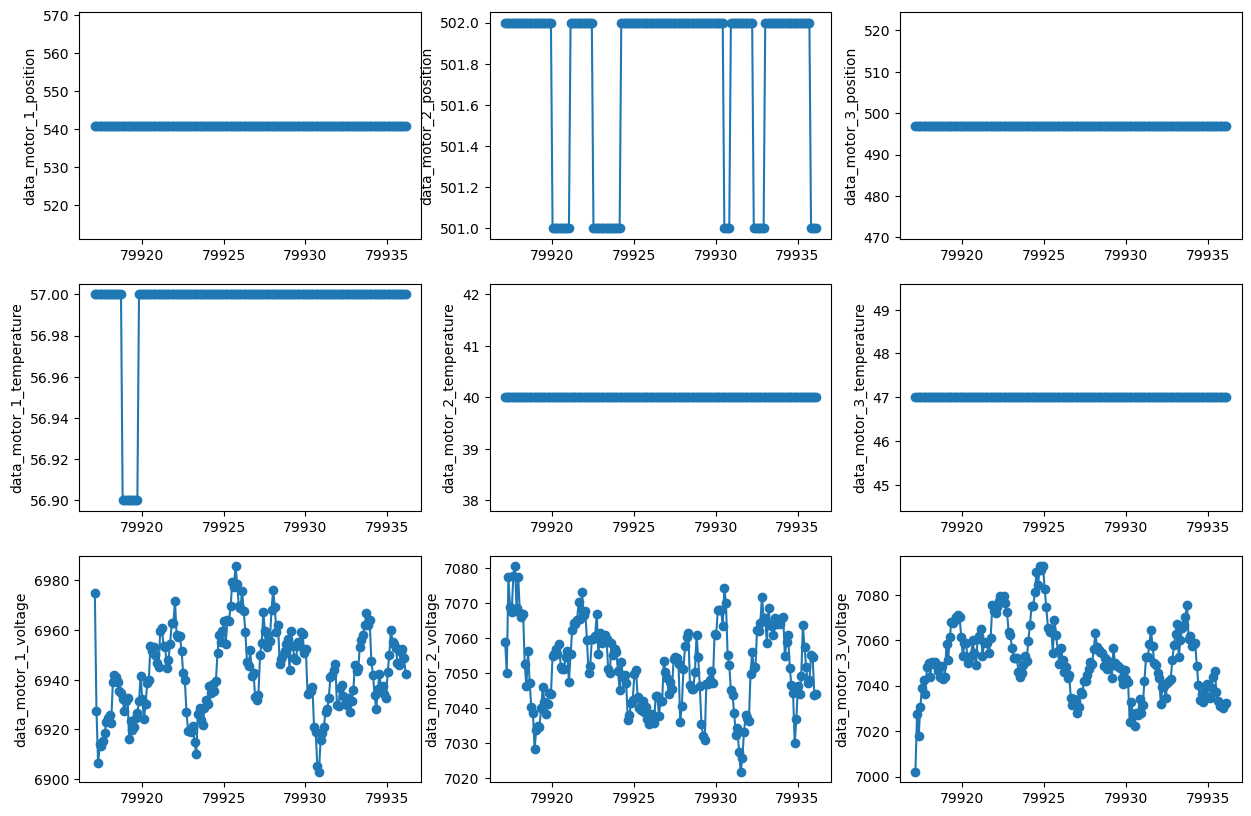

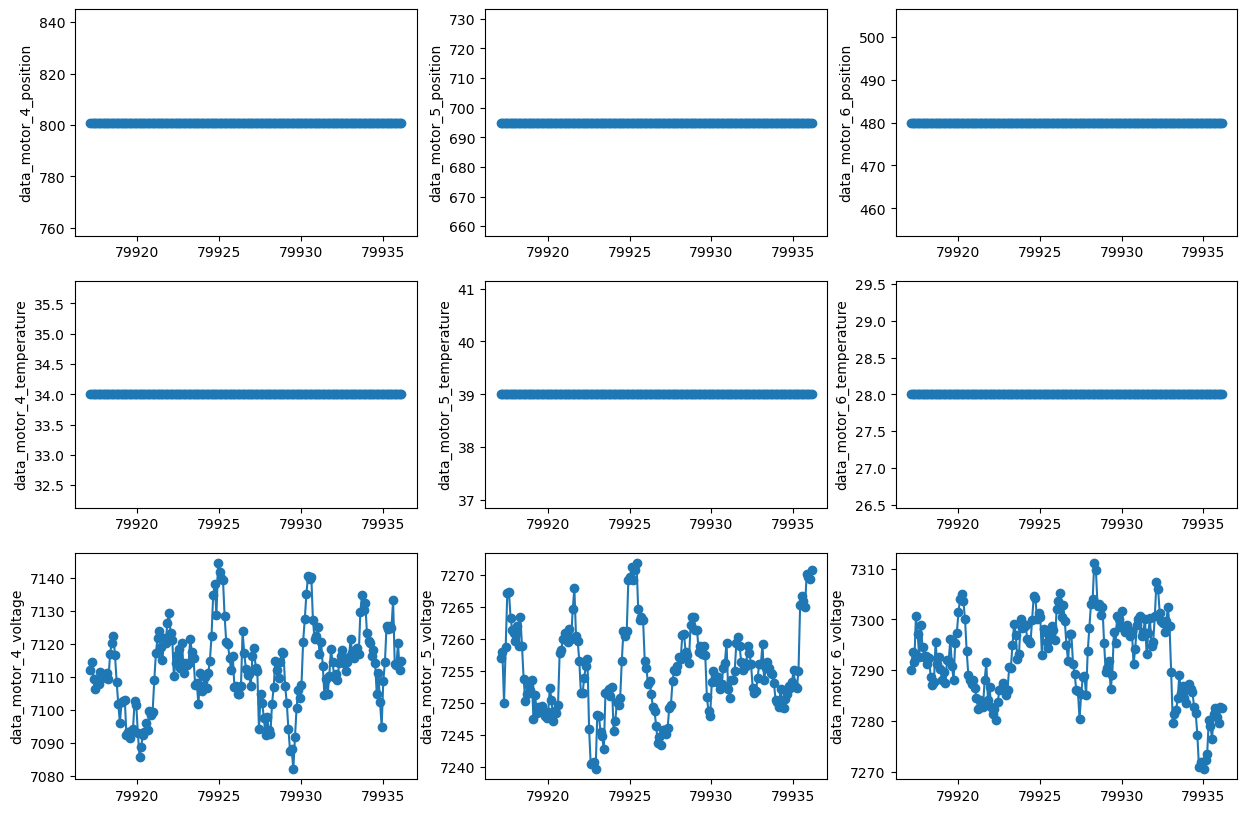

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



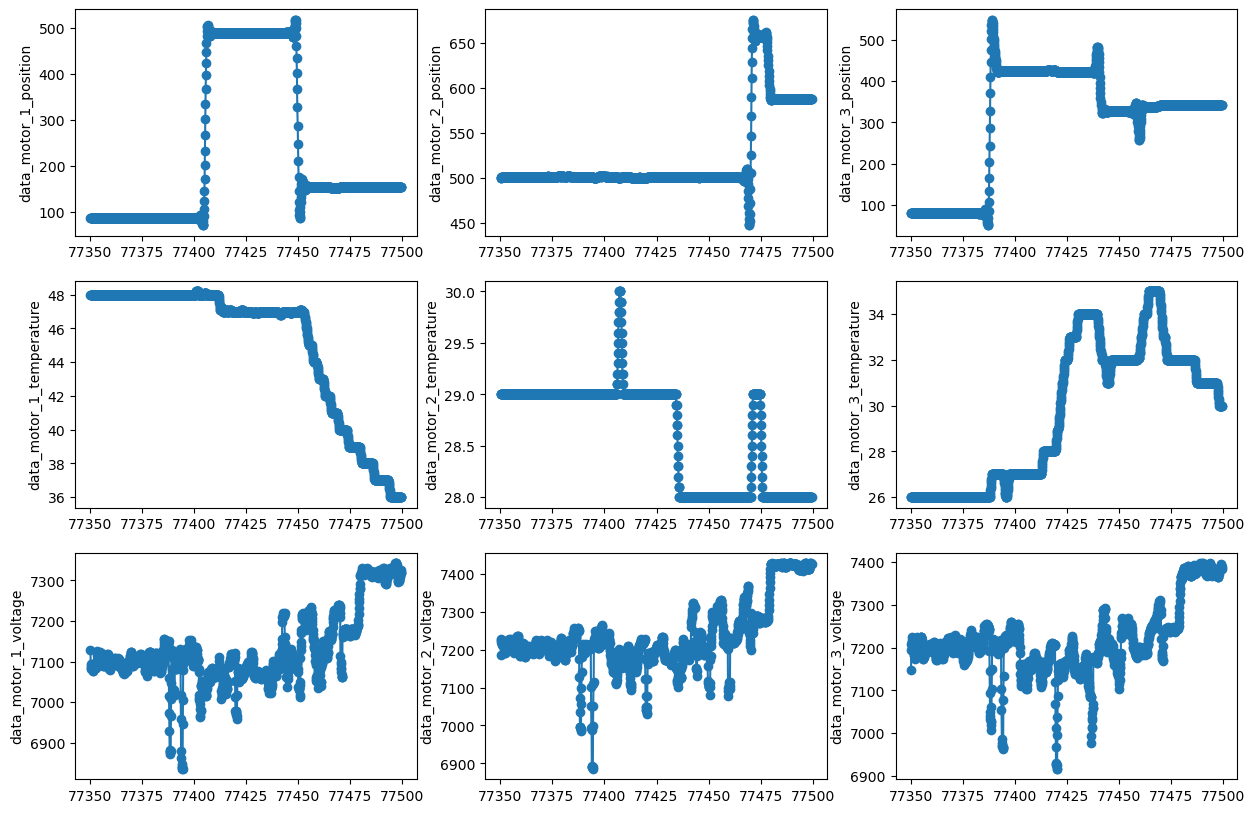

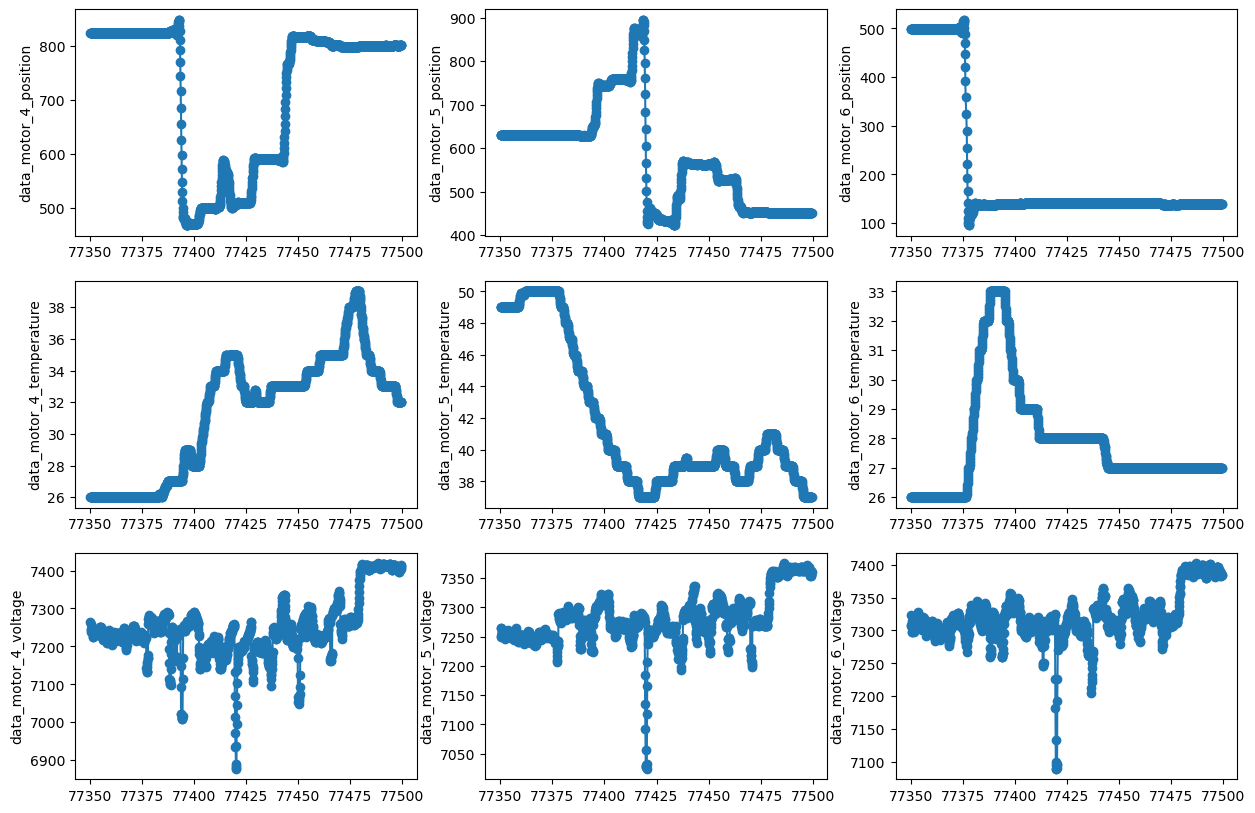

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



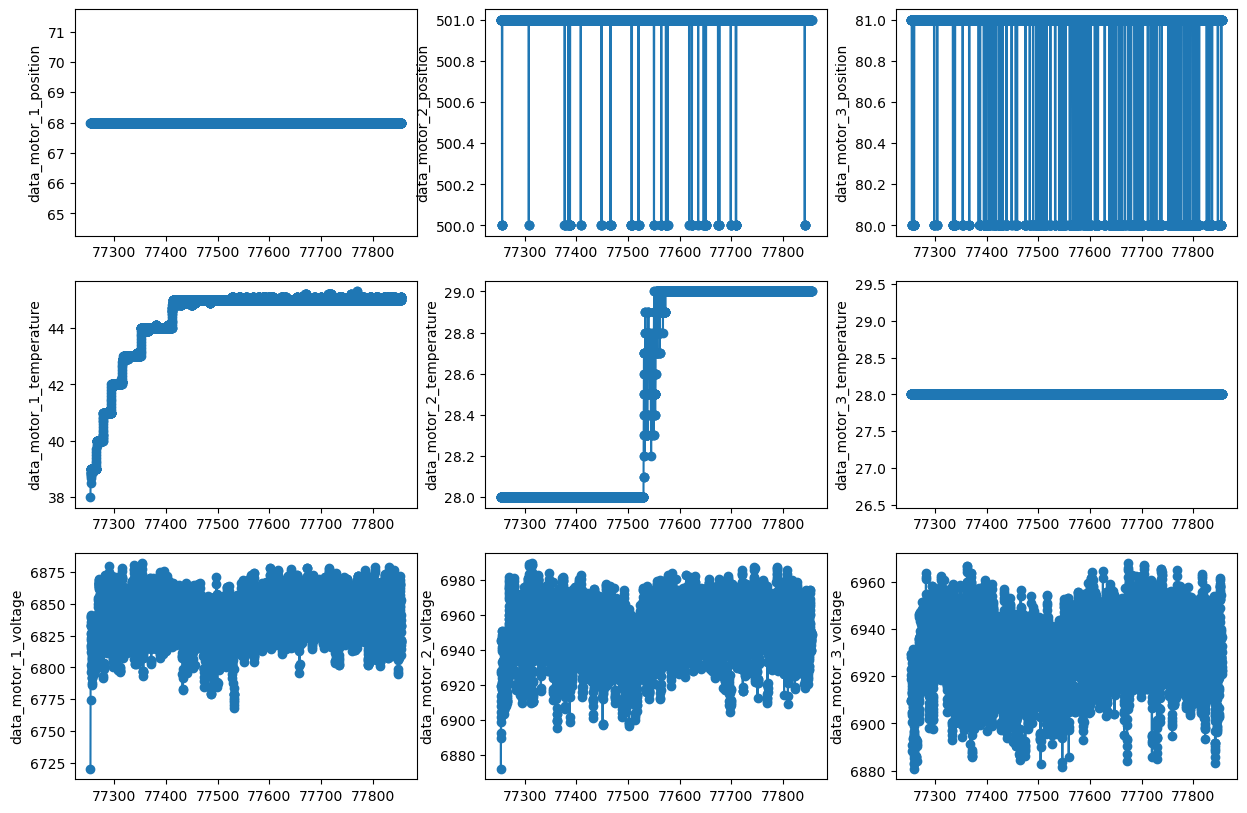

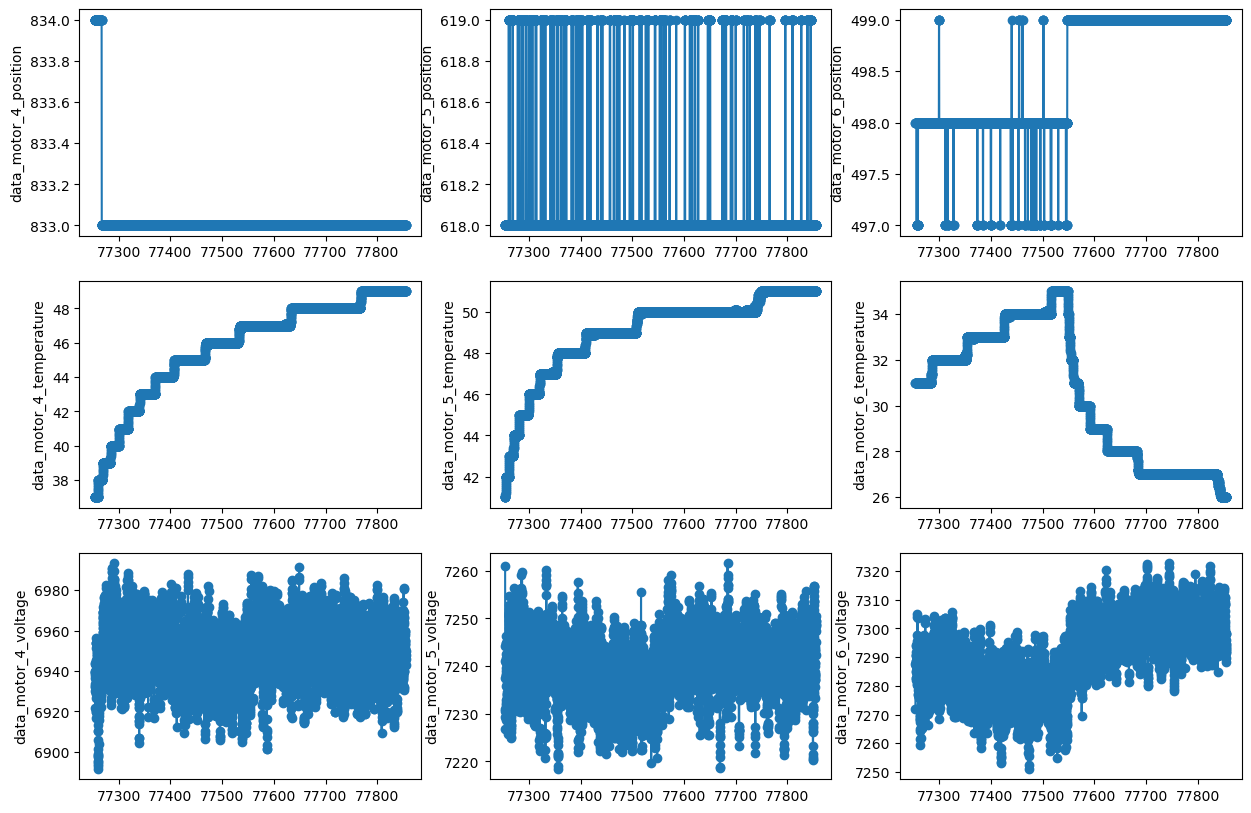

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



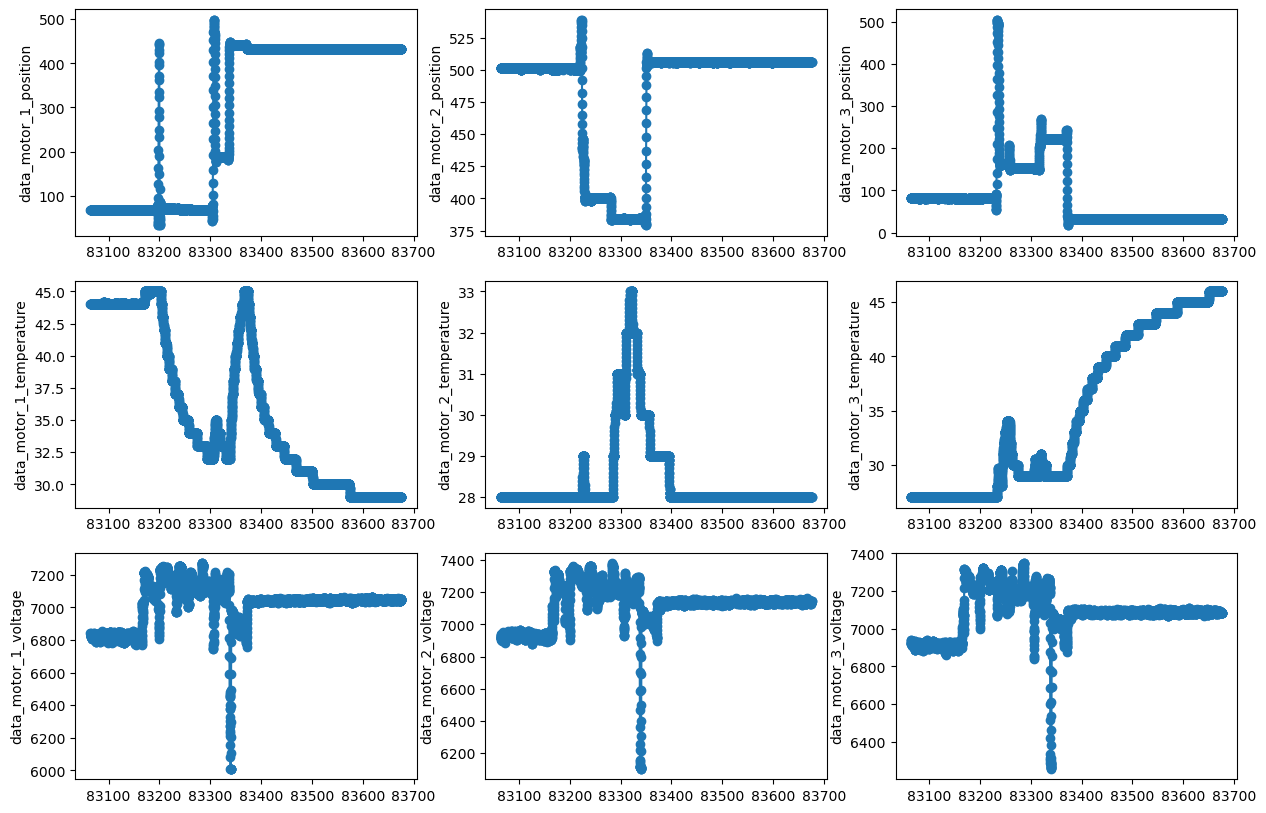

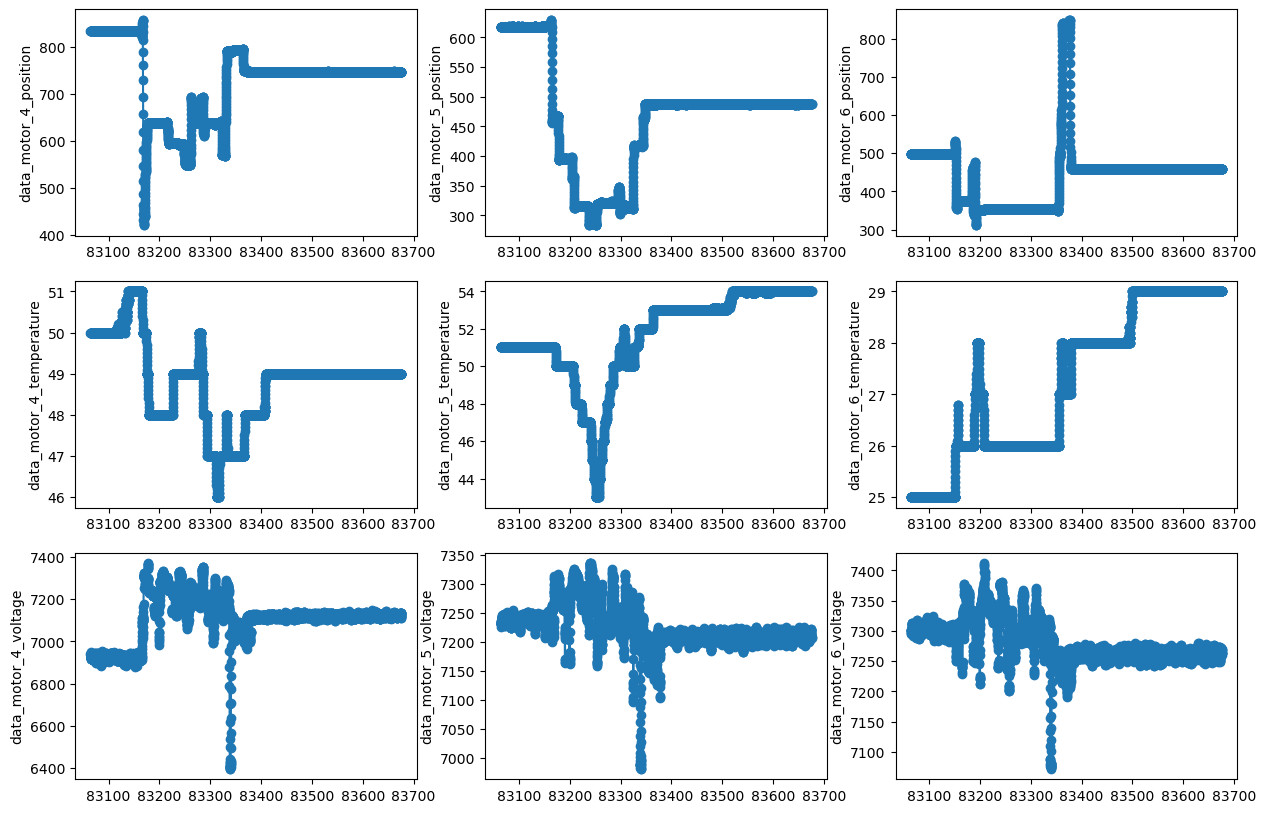

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



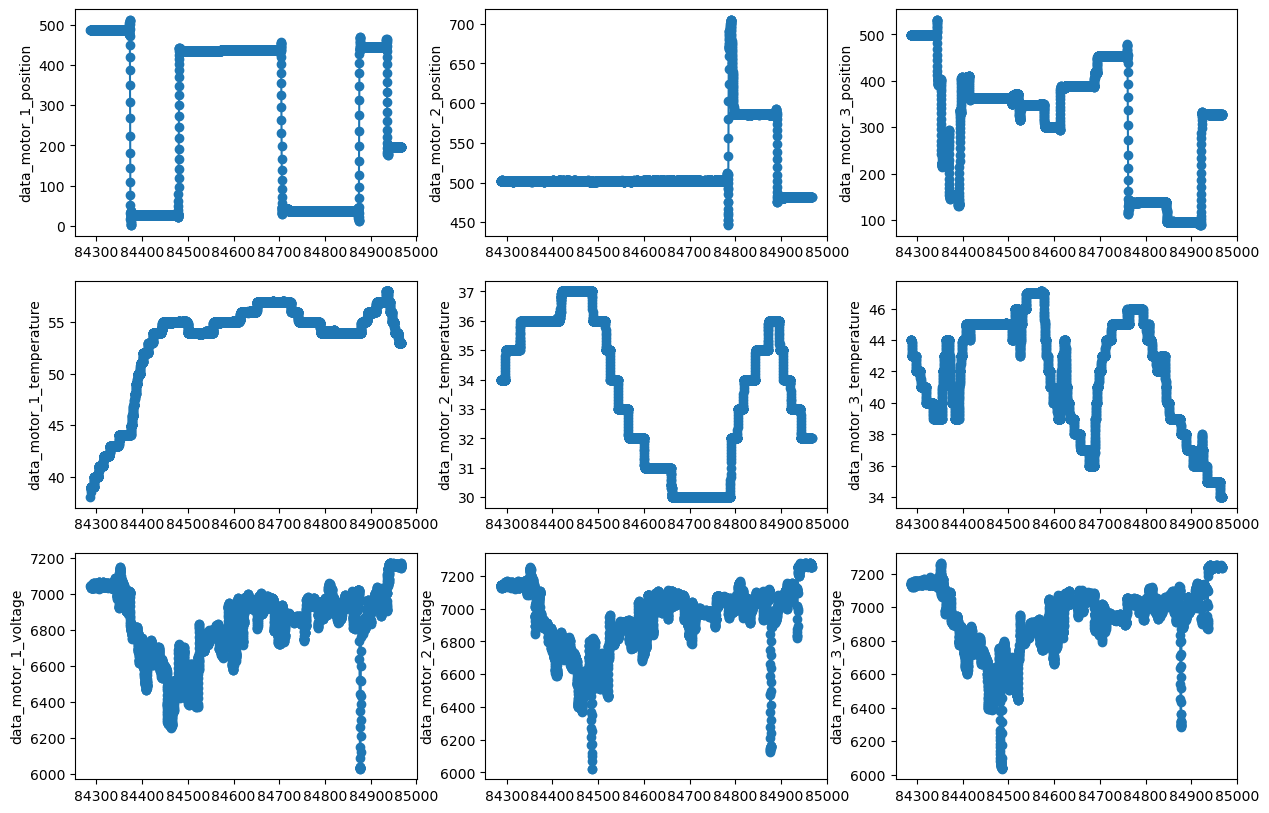

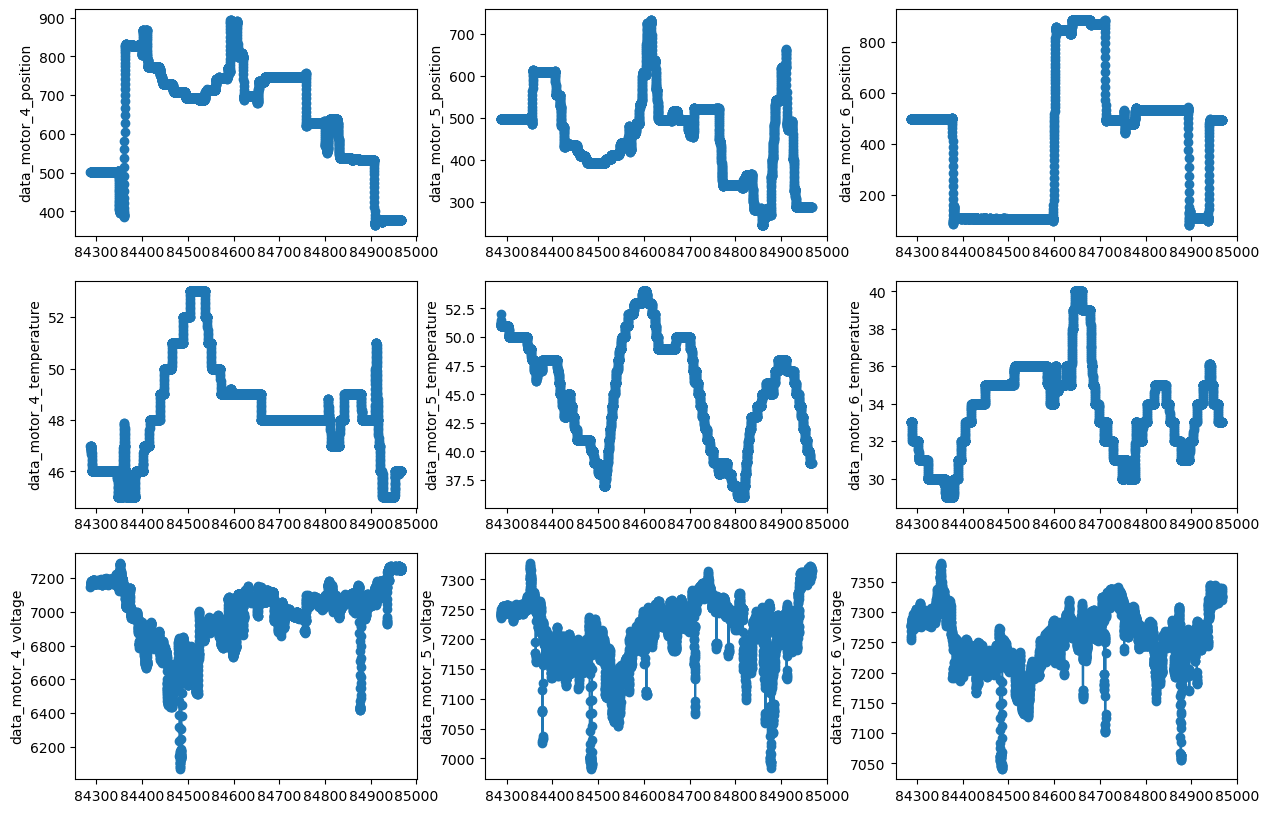

In [25]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Function to design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Function to apply the Butterworth low-pass filter
def lowpass_filter(data, cutoff_freq, sampling_freq, order=5):
    b, a = butter_lowpass(cutoff_freq, sampling_freq, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Set parameters for the low-pass filter
cutoff_frequency = .5  # Adjust as needed
sampling_frequency = 10  # Assuming your data is evenly spaced in time

def customized_outlier_removal(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].ffill()
    df['position'] = lowpass_filter(df['position'], cutoff_frequency, sampling_frequency)
    # df['position'] = df['position'].rolling(window=10, min_periods=1).mean()
    df['position'] = df['position'].round()

    df['temperature'] = df['temperature'].where(df['temperature'] <= 200, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()
    df['temperature'] = df['temperature'].rolling(window=10, min_periods=1).mean()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 8000, np.nan)
    df['voltage'] = df['voltage'].ffill()
    df['voltage'] = df['voltage'].rolling(window=10, min_periods=1).mean()
    

from utility import read_all_csvs_one_test
import matplotlib.pyplot as plt
import pandas as pd
import os

base_dictionary = '../../robot_digital_twin/condition_monitoring_matlab_ros/matlab_application/collected_data/'
# Get all the folders in the base_dictionary
path_list = os.listdir(base_dictionary)
# Only keep the folders, not the excel file.
path_list = path_list[:-1]

# Read the data.
df_data = pd.DataFrame()
for tmp_path in path_list:
    path = base_dictionary + tmp_path
    # Read the data with the customized outlier removal function.
    tmp_df = read_all_csvs_one_test(path, tmp_path, customized_outlier_removal)
    df_data = pd.concat([df_data, tmp_df])
    df_data = df_data.reset_index(drop=True)

# Read the test conditions
df_test_conditions = pd.read_excel(base_dictionary+'Test conditions.xlsx')

# Visulize the data
for selected_sequence_idx in path_list:
    filtered_df = df_data[df_data['test_condition'] == selected_sequence_idx]

    print('{}: {}\n'.format(selected_sequence_idx, df_test_conditions[df_test_conditions['Test id'] == selected_sequence_idx]['Description']))

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    for ax, col in zip(axes.flat, ['data_motor_1_position', 'data_motor_2_position', 'data_motor_3_position', 
        'data_motor_1_temperature', 'data_motor_2_temperature', 'data_motor_3_temperature',
        'data_motor_1_voltage', 'data_motor_2_voltage', 'data_motor_3_voltage']):
        ax.plot(filtered_df['time'], filtered_df[col], marker='o', label=col)
        ax.set_ylabel(col)

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    for ax, col in zip(axes.flat, ['data_motor_4_position', 'data_motor_5_position', 'data_motor_6_position',
        'data_motor_4_temperature', 'data_motor_5_temperature', 'data_motor_6_temperature',
        'data_motor_4_voltage', 'data_motor_5_voltage', 'data_motor_6_voltage']):
        ax.plot(filtered_df['time'], filtered_df[col], marker='o', label=col)
        ax.set_ylabel(col)

    plt.show()

## Correlation between varialbes

We can visualize the correlation between variables using a heatmap. Here, the purpose is to identify the features that are highly correlated to the response variable, and remove the features that are internally correlated. We have six response variable (we need one model per resposne variable).

<Axes: >

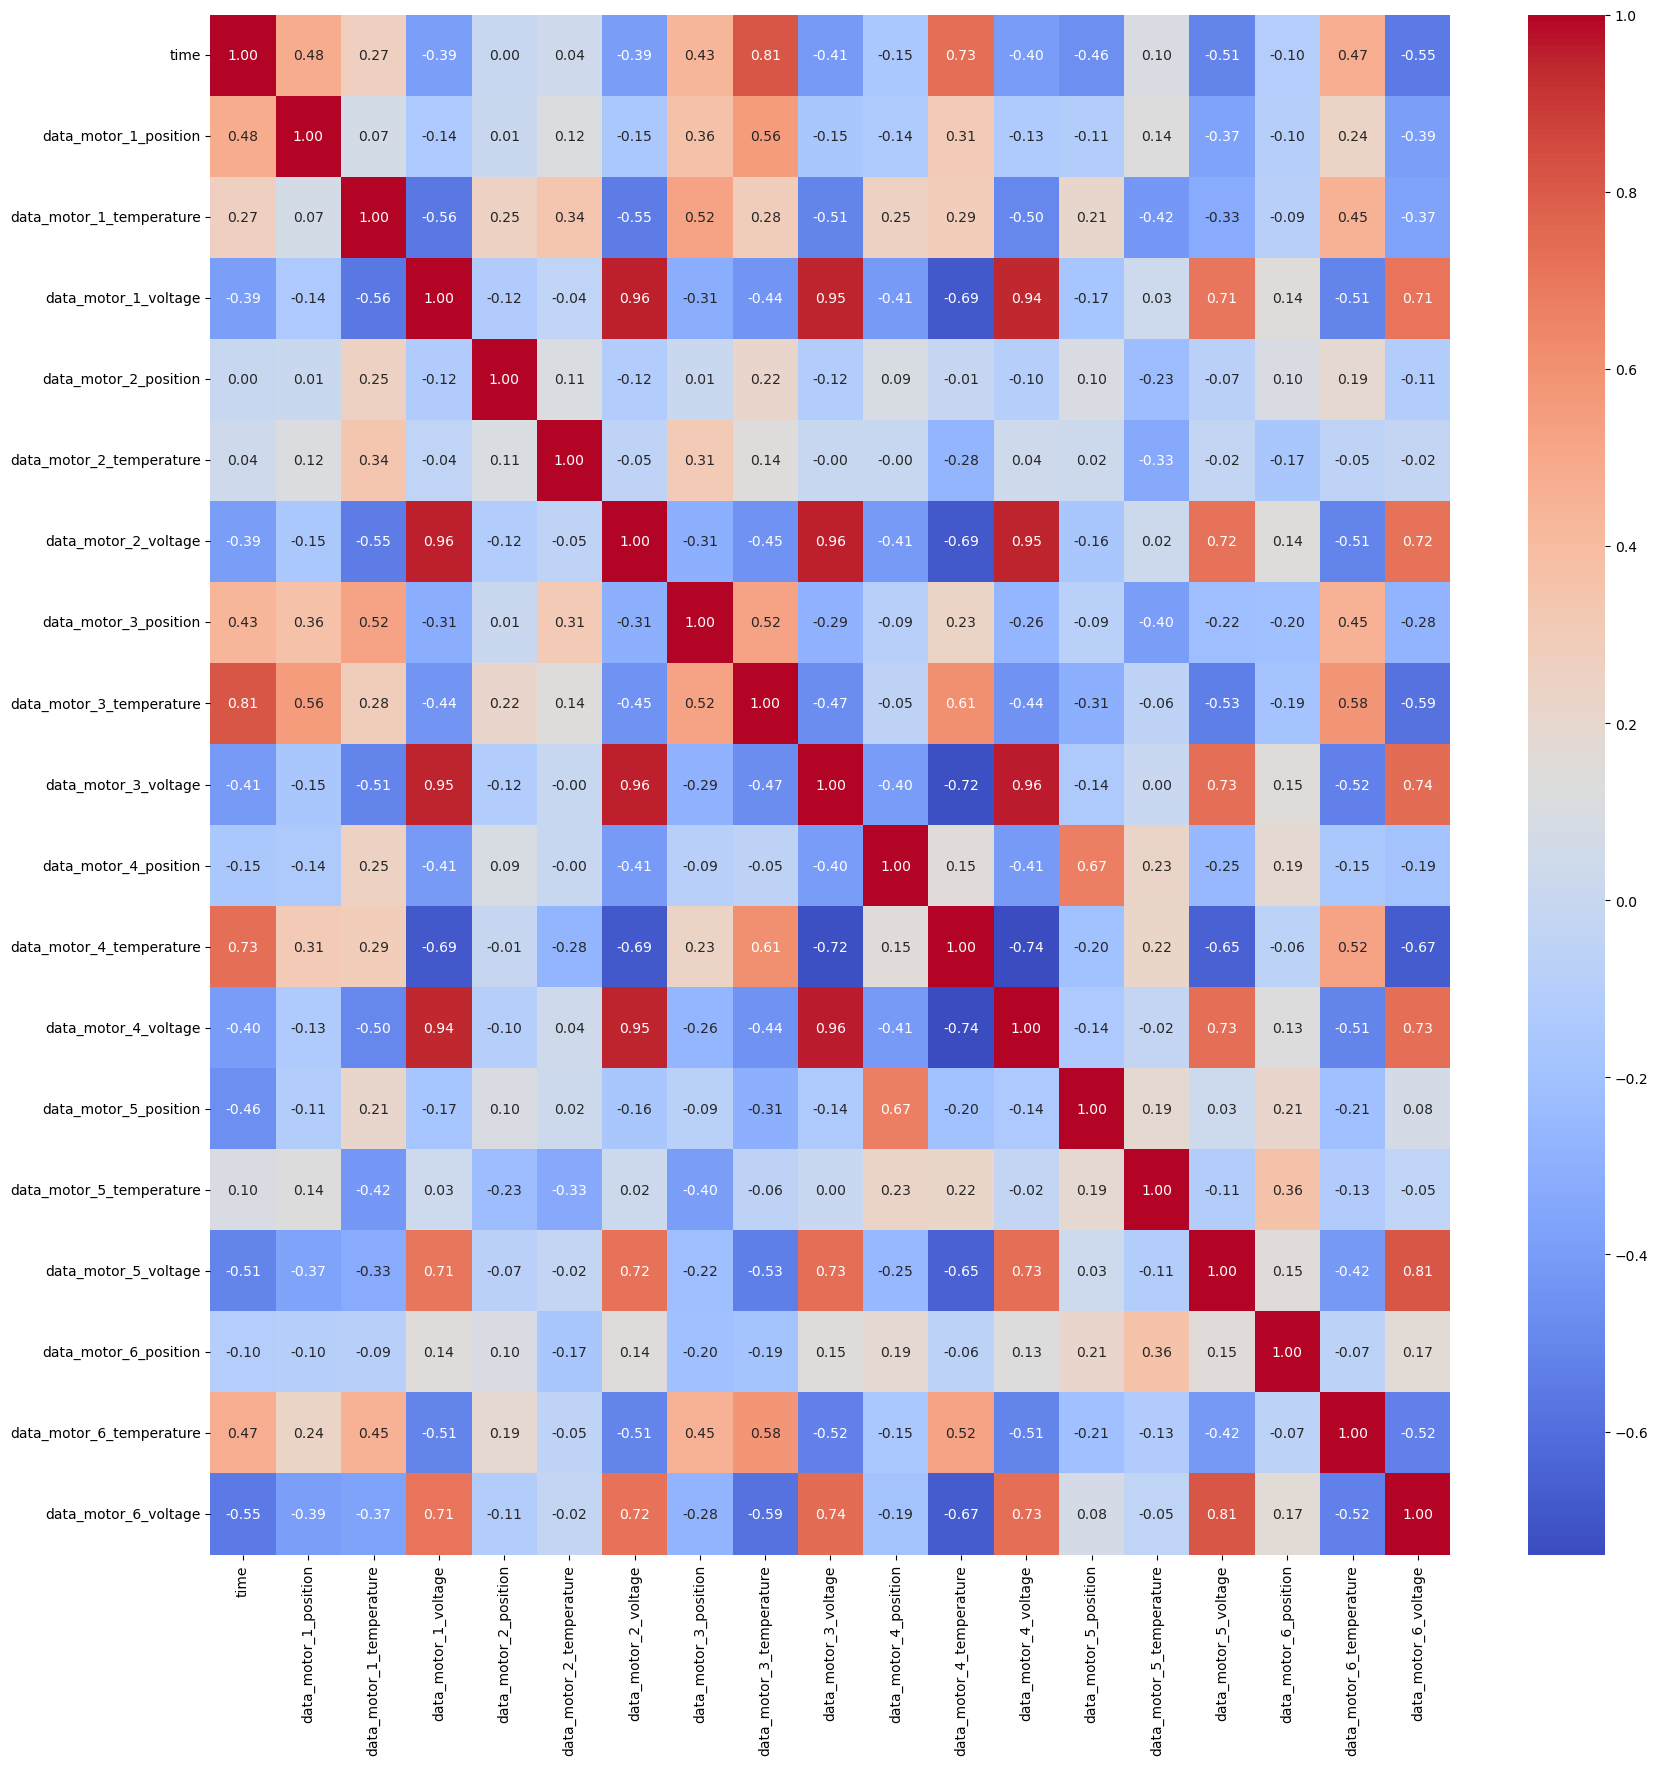

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# We keep only numerical variables. Remove the labels and it is not relavent in this case.
df_data_processed = df_data.drop(columns=['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label',
                                        'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label', 'test_condition'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the data and transform the data
df_data_processed = pd.DataFrame(data=scaler.fit_transform(df_data_processed), columns=df_data_processed.columns)

# Compute correlation matrix
correlation_matrix = df_data_processed.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(20, 20))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

## Train a simple prediction model using linear regression

### Use all the data to train and evaluate the performance on the training dataset.

In this section, we train a simple prediction model using linear regression to predict the temperature of motor 1. We do not select features so using all the features. We use the `sklearn` library to train the model. Here, we do not seperate between training and testing data, as the goal is to see the theoretical best performance of the model.

Training performance, max error is: 18.676566178080613
Training performance, mean root square error is: 4.393275329283529
Training performance, residual error > 3 (%): 50.29066966436486%
Prediction performance, max error is: 18.676566178080613
Prediction performance, mean root square error is: 4.393275329283529
Prediction performance, percentage of residual error > 350.29066966436486%


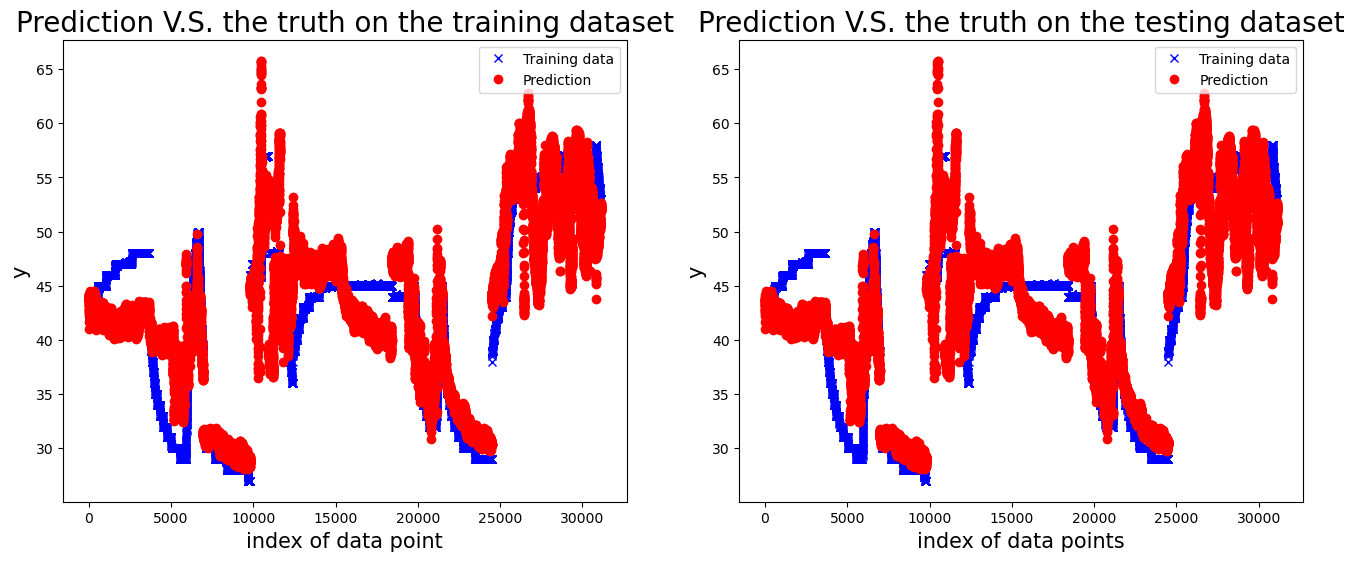

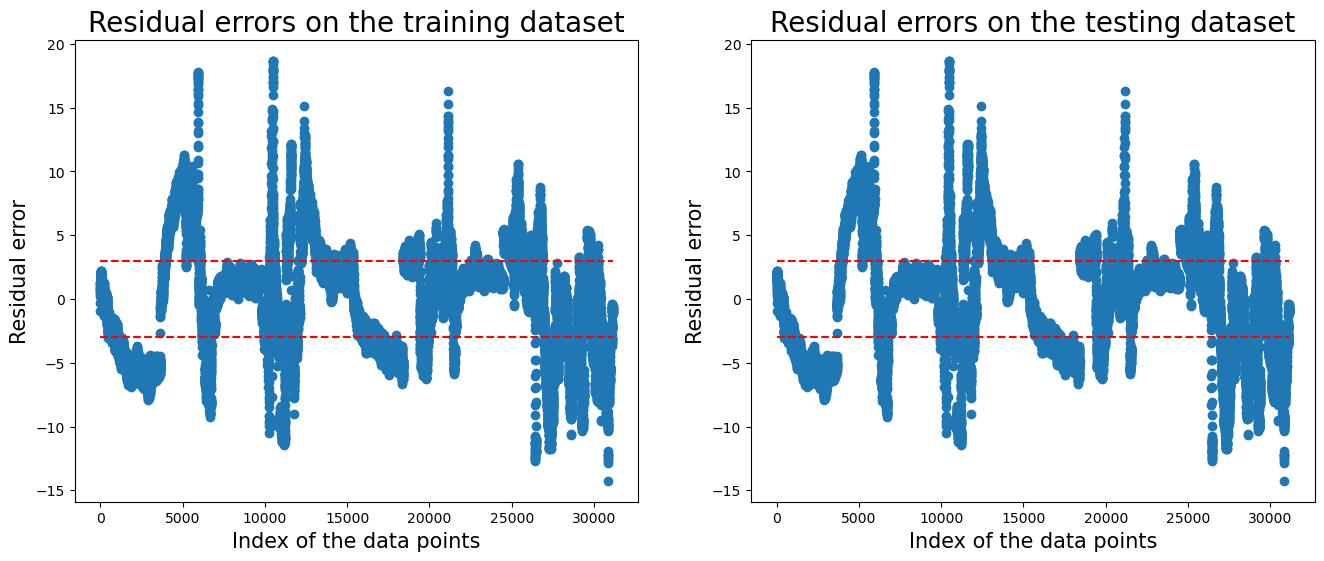

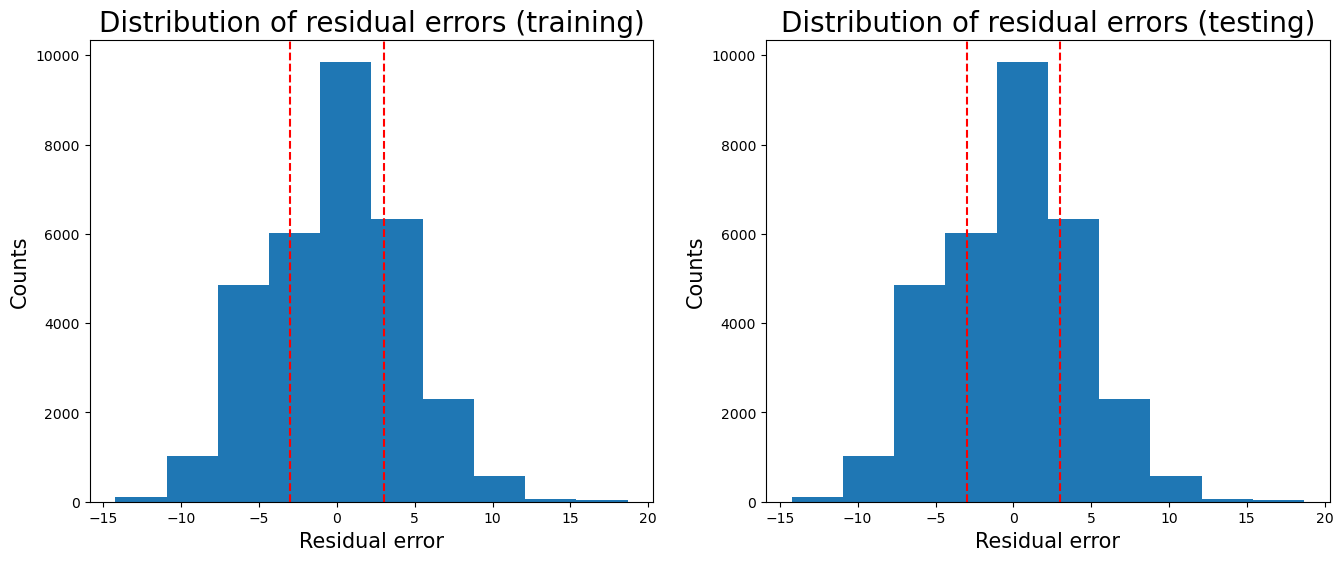

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utility import run_reg_mdl

# Seperate features and the response variable.
# name of the response variable.
y_name = 'data_motor_1_temperature'
# Remove the irrelavent features.
df_x = df_data.drop(columns=['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label',
                    'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label'])
df_x = df_x.drop(columns=[y_name])
# Get y.
y = df_data.loc[:, y_name]

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', LinearRegression())    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Now you can use this pipeline object for fitting and prediction
reg_mdl, y_pred_tr, y_pred = run_reg_mdl(pipeline, df_x, y, df_x, y)


Training performance, max error is: 75.00480604916234
Training performance, mean root square error is: 4.548535604243274
Training performance, residual error > 3 (%): 52.12140677693914%
Prediction performance, max error is: 75.00480604916234
Prediction performance, mean root square error is: 4.548535604243274
Prediction performance, percentage of residual error > 352.12140677693914%


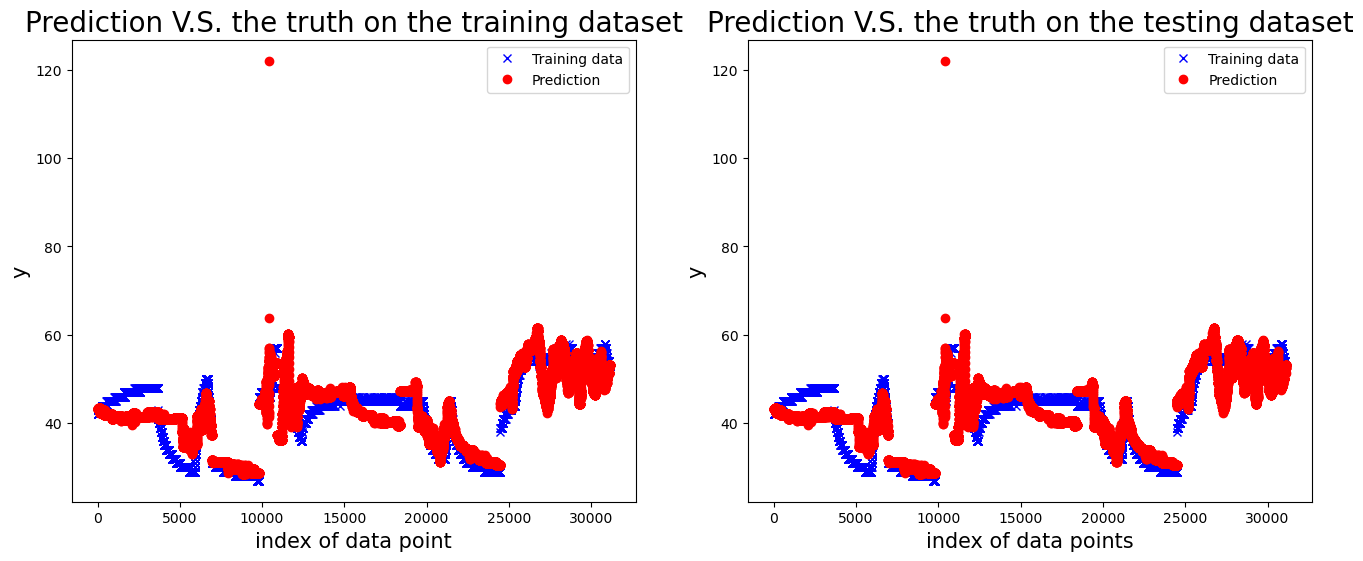

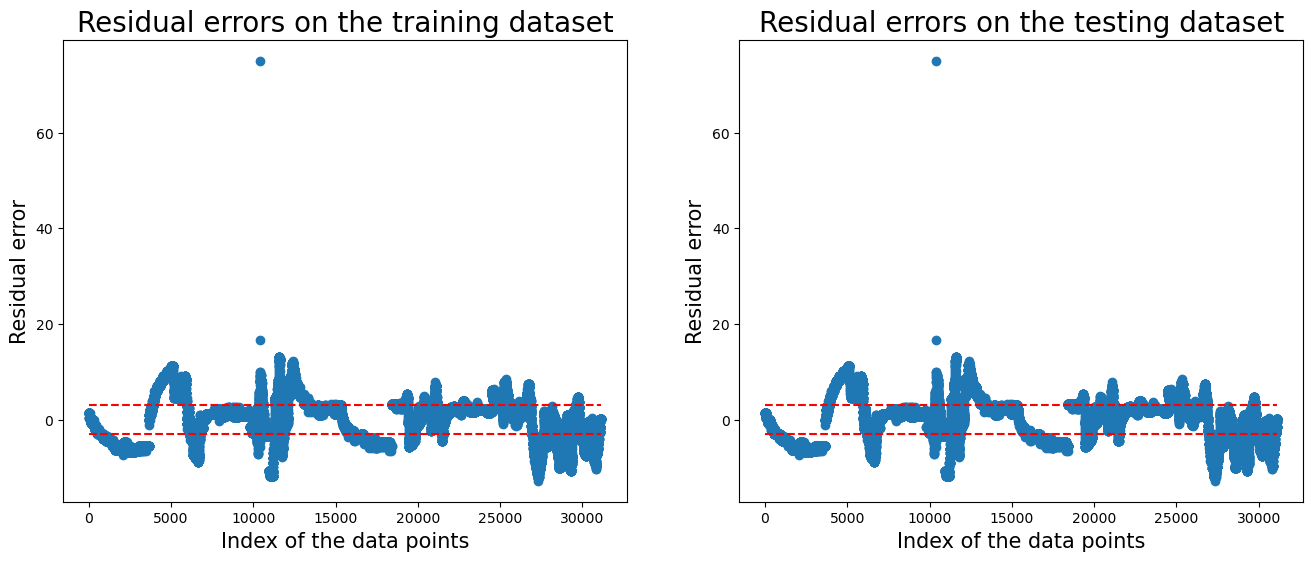

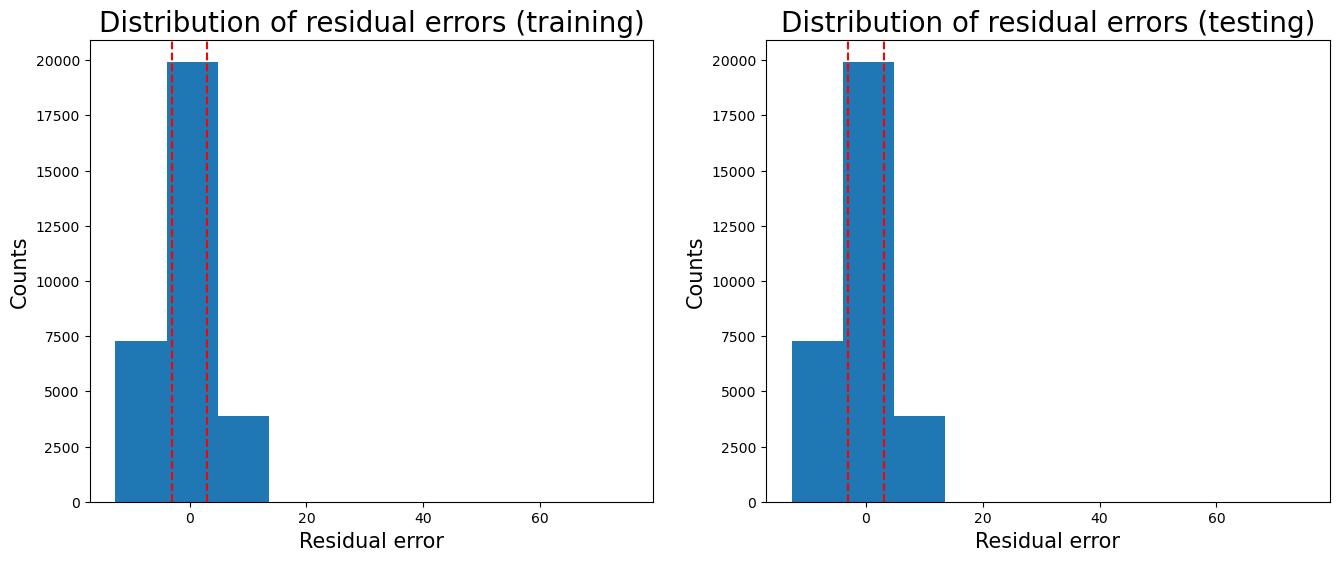

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utility import run_reg_mdl

# Seperate features and the response variable.
# name of the response variable.
y_name = 'data_motor_1_temperature'
# Remove the irrelavent features.
df_x = df_data.drop(columns=['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label',
                    'data_motor_4_label', 'data_motor_5_label', 'data_motor_6_label'])
df_x = df_x.drop(columns=['data_motor_1_voltage', 'data_motor_2_voltage', 'data_motor_3_voltage',
                    'data_motor_4_voltage', 'data_motor_5_voltage', 'data_motor_6_voltage'])
df_x = df_x.drop(columns=[y_name])
# Get y.
y = df_data.loc[:, y_name]

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', LinearRegression())    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Now you can use this pipeline object for fitting and prediction
reg_mdl, y_pred_tr, y_pred = run_reg_mdl(pipeline, df_x, y, df_x, y)


### 5-fold cross validation

Then, we run a 5 fold cross validation: Each time, training the model using 8 trajectories while testing on the remaining 2.

In [26]:
from utility import run_cross_val

# Now you can use this pipeline object for fitting and prediction
df_perf = run_cross_val(pipeline, df_x, y, threshold=3)
print(df_perf)
print(df_perf.mean())

   Max error       RMSE  Exceed boundary rate
0  13.110288   7.255764              0.906151
1   7.217336   5.776277              0.957661
2  88.605380   4.908613              0.337715
3  20.237569   7.678062              0.699893
4  41.460782  19.482328              0.945396
Max error               34.126271
RMSE                     9.020209
Exceed boundary rate     0.769363
dtype: float64


## Use a sliding window to predict the next point

In this section, we show a demonstration of how to use a sliding window to predict the next point. We first define a window. Then, the previous points in the window will be used to predict the next point. When the window size shrink to 1, it is equial to the previous model.

In [27]:
from utility import run_cross_val

df_perf = run_cross_val(pipeline, df_x, y, threshold=3, window_size=5)
print(df_perf.mean)
print(df_perf.mean())

<bound method NDFrame._add_numeric_operations.<locals>.mean of    Max error       RMSE  Exceed boundary rate
0  12.572650   7.221204              0.894820
1   7.708583   5.418695              0.958895
2  80.869036   5.052694              0.330275
3  20.900421   7.657132              0.727297
4  44.709575  21.743488              0.914858>
Max error               33.352053
RMSE                     9.418642
Exceed boundary rate     0.765229
dtype: float64


In [28]:
from utility import run_cross_val

df_perf = run_cross_val(pipeline, df_x, y, threshold=3, window_size=50)
print(df_perf.mean)
print(df_perf.mean())

<bound method NDFrame._add_numeric_operations.<locals>.mean of    Max error       RMSE  Exceed boundary rate
0  13.691386   7.431261              0.903936
1   7.312986   4.767645              0.973245
2  73.371728   6.285091              0.446689
3  25.087936   7.670526              0.749864
4  44.892118  21.608232              0.820744>
Max error               32.871231
RMSE                     9.552551
Exceed boundary rate     0.778896
dtype: float64
